# <center> Credit Score Classification</Center>

##### Team members
##### Faiza Ayoun |Sanjana Balagar | Ha PHan | Aswini Pusuluri | Sowmya Ravichandran
##### DATA 240 | Data mining | Fall 2022

## System Set up and Importing Libraries

In [ ]:
import os 

from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/Shareddrives/Data 240/datasets")


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from yellowbrick.classifier import ROCAUC
 #!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

## Data Understanding

### Load the Credit Scoring File

In [ ]:
### import the file
cs= pd.read_csv('train.csv')

In [ ]:
pd.set_option('display.max_columns', 30)
cs.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [ ]:
cs.shape

(100000, 28)

In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Null Values

In [ ]:
round(( cs.isna().sum()/len(cs) ) * 100).sort_values(ascending=False)

Monthly_Inhand_Salary       15.0
Type_of_Loan                11.0
Name                        10.0
Credit_History_Age           9.0
Num_of_Delayed_Payment       7.0
Amount_invested_monthly      4.0
Num_Credit_Inquiries         2.0
Monthly_Balance              1.0
ID                           0.0
Changed_Credit_Limit         0.0
Payment_Behaviour            0.0
Total_EMI_per_month          0.0
Payment_of_Min_Amount        0.0
Credit_Utilization_Ratio     0.0
Outstanding_Debt             0.0
Credit_Mix                   0.0
Delay_from_due_date          0.0
Customer_ID                  0.0
Num_of_Loan                  0.0
Interest_Rate                0.0
Num_Credit_Card              0.0
Num_Bank_Accounts            0.0
Annual_Income                0.0
Occupation                   0.0
SSN                          0.0
Age                          0.0
Month                        0.0
Credit_Score                 0.0
dtype: float64

In [ ]:
#cs["Credit_History_Age"].unique()

In [ ]:
cs.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [ ]:
def describe_cat(data):
    table=pd.DataFrame(columns = data.select_dtypes("object").columns, index = ["count", "nulls","%miss", 'cardinality', "mode"])
    for col in data.select_dtypes("object").columns :
        table.loc["count"][col] = len(data[data[col].isna()==False])
        table.loc["nulls"][col] = len(data[data[col].isna() == True])
        table.loc["%miss"][col] = table.loc["nulls"][col]/table.loc["count"][col]
        table.loc["cardinality"][col]= len(data[col].unique())
        table.loc["mode"][col]= data[col].value_counts().index[0]    

    return table

In [ ]:
describe_cat(cs)

ID Customer_ID    Month      Name     Age        SSN  \
count        100000      100000   100000     90015  100000     100000   
nulls             0           0        0      9985       0          0   
%miss           0.0         0.0      0.0  0.110926     0.0        0.0   
cardinality  100000       12500        8     10140    1788      12501   
mode         0x1602   CUS_0xd40  January    Langep      38  #F%$D@*&8   

            Occupation Annual_Income Num_of_Loan   Type_of_Loan  \
count           100000        100000      100000          88592   
nulls                0             0           0          11408   
%miss              0.0           0.0         0.0        0.12877   
cardinality         16         18940         434           6261   
mode           _______      36585.12           3  Not Specified   

            Num_of_Delayed_Payment Changed_Credit_Limit Credit_Mix  \
count                        92998               100000     100000   
nulls                         7002                    0          0   
%miss                     0.075292                  0.0        0.0   
cardinality                    750                 4384          4   
mode                            19                    _   Standard   

            Outstanding_Debt      Credit_History_Age Payment_of_Min_Amount  \
count                 100000                   90970                100000   
nulls                      0                    9030                     0   
%miss                    0.0                0.099263                   0.0   
cardinality            13178                     405                     3   
mode                 1360.45  15 Years and 11 Months                   Yes   

            Amount_invested_monthly               Payment_Behaviour  \
count                         95521                          100000   
nulls                          4479                               0   
%miss                       0.04689                             0.0   
cardinality                   91050                               7   
mode                      __10000__  Low_spent_Small_value_payments   

                              Monthly_Balance Credit_Score  
count                                   98800       100000  
nulls                                    1200            0  
%miss                                0.012146          0.0  
cardinality                             98793            3  
mode         __-333333333333333333333333333__     Standard

## Data Preparation

### CS1

#### split credit_History_Age into year and month then drop column (21)

In [ ]:
#cs["Credit_History_Age_Month"] = np.nan
#cs["Credit_History_Age_Year"]= np.nan
for i,row in cs.iterrows() :
  if not(pd.isnull(row["Credit_History_Age"])):
    age_year= row["Credit_History_Age"].split()[0]
    age_month= row["Credit_History_Age"].split()[3]
    cs.loc[i,"Credit_History_Age_Year"]=age_year
    cs.loc[i,"Credit_History_Age_Month"]=age_month


In [ ]:
cs.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score Credit_History_Age_Year  \
0  312.49408867943663         Good                      22   
1  284.62916249607184         Good                     NaN   
2   331.2098628537912         Good                      22   
3  223.45130972736786         Good                      22   
4  341.48923103222177         Good                      22   

  Credit_History_Age_Month  
0                        1  
1                      NaN  
2                        3  
3                        4  
4                        5

In [ ]:
cs = cs.drop(['Credit_History_Age'], axis =1)


In [ ]:
#cs.to_csv('Credit_score_after_col_split.csv', index=False)
#!cp Credit_score_after_col_split.csv "/content/gdrive/Shareddrives/Data 240/Datasets"

#### change the month name into month number (2)

In [ ]:
cs = pd.read_csv('Credit_score_after_col_split.csv')

In [ ]:
cs["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
for i,row in cs.iterrows():
  cs.loc[i,"Month_number"]  = datetime.strptime(row["Month"], "%B").month

In [ ]:
#cs.to_csv('cs1.csv', index=False)
#!cp cs1.csv "/content/gdrive/Shareddrives/Data 240/datasets"

#### Fill up the month and year for creadit store history age 

In [ ]:
### import the file
cs1= pd.read_csv('cs1.csv')

In [ ]:
#cs1[cs1["Credit_History_Age"].isna()]

KeyError: ignored

In [ ]:
# Example of null values
cs1[cs1["Customer_ID"]=="CUS_0xa123"]

ID Customer_ID     Month             Name Age          SSN  \
54496  0x15552  CUS_0xa123   January  Laura MacInnise  42  514-14-5445   
54497  0x15553  CUS_0xa123  February  Laura MacInnise  42  514-14-5445   
54498  0x15554  CUS_0xa123     March  Laura MacInnise  42  514-14-5445   
54499  0x15555  CUS_0xa123     April  Laura MacInnise  43  514-14-5445   
54500  0x15556  CUS_0xa123       May  Laura MacInnise  43  514-14-5445   
54501  0x15557  CUS_0xa123      June  Laura MacInnise  43  514-14-5445   
54502  0x15558  CUS_0xa123      July  Laura MacInnise  43  514-14-5445   
54503  0x15559  CUS_0xa123    August  Laura MacInnise  43  514-14-5445   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
54496  Media_Manager     6743776.0            2256.406667                  8   
54497  Media_Manager      24688.88            2256.406667                  8   
54498  Media_Manager      24688.88            2256.406667                  8   
54499  Media_Manager      24688.88            2256.406667                  8   
54500  Media_Manager     24688.88_            2256.406667                  8   
54501        _______      24688.88            2256.406667                  8   
54502  Media_Manager      24688.88            2256.406667                  8   
54503  Media_Manager      24688.88            2256.406667                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan   Type_of_Loan  \
54496                4              9           1  Personal Loan   
54497                4           5240           1  Personal Loan   
54498                4              9           1  Personal Loan   
54499                4              9           1  Personal Loan   
54500                4              9           1  Personal Loan   
54501              483              9        -100  Personal Loan   
54502                4              9           1  Personal Loan   
54503                4              9           1  Personal Loan   

       Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit  \
54496                   20                     15                11.74   
54497                   20                     15                11.74   
54498                   22                     15                11.74   
54499                   23                     15                11.74   
54500                   25                    NaN                11.74   
54501                   21                     14                13.74   
54502                   20                     15                12.74   
54503                   20                     17                11.74   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
54496                   3.0   Standard          1014.83   
54497                   3.0          _          1014.83   
54498                   3.0   Standard          1014.83   
54499                   3.0   Standard          1014.83   
54500                   7.0   Standard          1014.83   
54501                   7.0   Standard          1014.83   
54502                   7.0   Standard          1014.83   
54503                   7.0   Standard          1014.83   

       Credit_Utilization_Ratio Payment_of_Min_Amount  Total_EMI_per_month  \
54496                 39.330881                    No            10.869317   
54497                 23.264998                    No            10.869317   
54498                 35.212121                    NM            10.869317   
54499                 27.319607                    No            10.869317   
54500                 34.410748                    No            10.869317   
54501                 29.669007                    NM            10.869317   
54502                 23.688027                    No            10.869317   
54503                 27.716830                    No            10.869317   

      Amount_invested_monthly                 Payment_Behaviour  \
54496      177.23188826777883    Low_spent

In [ ]:
cs1.sort_values(by = ["Customer_ID", "Month_number", "Credit_History_Age_Year"], inplace=True)
cs1 = cs1.reset_index(drop=True)

In [ ]:
for i in range(1,5): 
  for i, row in cs1.iterrows():
    if not(np.isnan(cs1.loc[i, 'Credit_History_Age_Month'])):
      if i<len(cs1)-1 and i>1: 
        if (cs1.loc[i, 'Customer_ID'] == cs1.loc[i+1, 'Customer_ID']) and np.isnan(cs1.loc[i+1, 'Credit_History_Age_Month']): 
          if cs1.loc[i, 'Credit_History_Age_Month'] == 11 :
            cs1.loc[i+1, 'Credit_History_Age_Month'] = 0
            cs1.loc[i+1, 'Credit_History_Age_Year'] = cs1.loc[i, 'Credit_History_Age_Year'] + 1
          else:
            cs1.loc[i+1, 'Credit_History_Age_Month'] = cs1.loc[i, 'Credit_History_Age_Month']+1
            cs1.loc[i+1, 'Credit_History_Age_Year'] = cs1.loc[i, 'Credit_History_Age_Year']
        if (cs1.loc[i, 'Customer_ID'] == cs1.loc[i-1, 'Customer_ID']) and np.isnan(cs1.loc[i-1, 'Credit_History_Age_Month']): 
          if cs1.loc[i, 'Credit_History_Age_Month'] == 0 :
            cs1.loc[i-1,'Credit_History_Age_Month'] = 11
            cs1.loc[i-1,'Credit_History_Age_Year'] = cs1.loc[i] ['Credit_History_Age_Year'] - 1
          else :
            cs1.loc[i-1, 'Credit_History_Age_Month'] = row['Credit_History_Age_Month']-1
            cs1.loc[i-1, 'Credit_History_Age_Year'] = row['Credit_History_Age_Year']



In [ ]:
cs1 = cs1.drop(['Credit_History_Age'], axis =1)

KeyError: ignored

In [ ]:
#cs1.to_csv('cs_after_remove_null_history_age.csv', index=False)
#!cp cs_after_remove_null_history_age.csv "/content/gdrive/Shareddrives/Data 240/Datasets"

### CS2

#### Fill up the null names(3)



In [ ]:
cs2 = pd.read_csv('cs_after_remove_null_history_age.csv')

In [ ]:
cs2[cs2["Name"].isna()]

ID Customer_ID     Month Name   Age          SSN     Occupation  \
1      0x1628b  CUS_0x1000  February  NaN    17  913-74-1218         Lawyer   
18      0x1ef8  CUS_0x100b     March  NaN    18  238-62-0395  Media_Manager   
46     0x1941c  CUS_0x1015      July  NaN    27  810-97-7024     Journalist   
84      0xb9da  CUS_0x1032       May  NaN  1853  620-58-8045         Lawyer   
85      0xb9db  CUS_0x1032      June  NaN    40  620-58-8045         Lawyer   
...        ...         ...       ...  ...   ...          ...            ...   
99959  0x18835   CUS_0xfea    August  NaN    33  731-85-6329        Manager   
99963   0x344d   CUS_0xff3     April  NaN    55  726-35-5322      Scientist   
99967   0x3451   CUS_0xff3    August  NaN    55    #F%$D@*&8      Scientist   
99969   0x16ab   CUS_0xff4  February  NaN  -500  655-05-7666   Entrepreneur   
99997  0x25aff   CUS_0xffd      June  NaN    29  832-88-8320      Scientist   

            Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
1                30625.94                    NaN                  6   
18     113781.38999999998                    NaN                  1   
46               46951.02            3725.585000                  7   
84               60410.94            5274.245000                  4   
85               60410.94            5274.245000                  4   
...                   ...                    ...                ...   
99959            44264.41            3755.700833                  3   
99963           17032.785                    NaN                  0   
99967           17032.785            1176.398750                  0   
99969            25546.26                    NaN                  8   
99997            41398.44                    NaN                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
1                    5             27           2   
18                   4              1           0   
46                   4             16           0   
84                   7             17           4   
85                   7             17           4   
...                ...            ...         ...   
99959                3              6           2   
99963                6           3808           3   
99967                6              2           3   
99969                7             14           5   
99997                7             13           6   

                                            Type_of_Loan  Delay_from_due_date  \
1              Credit-Builder Loan, and Home Equity Loan                   62   
18                                                   NaN                   19   
46                                                   NaN                    8   
84     Student Loan, Home Equity Loan, Not Specified,...                   23   
85     Student Loan, Home Equity Loan, Not Specified,...                   23   
...                                                  ...                  ...   
99959                     Student Loan, and Student Loan                   11   
99963        Personal Loan, Mortgage Loan, and Auto Loan                   13   
99967        Personal Loan, Mortgage Loan, and Auto Loan                   13   
99969  Not Specified, Student Loan, Student Loan, Cre...                   16   
99997  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
1                         23                 1.63                  11.0   
18                         7                11.34                   1.0   
46                         9                15.83                   9.0   
84                       NaN                 7.65                   9.0   
85                       NaN                 7.65                   9.0   
...                      ...                  ...                   ...   
99959                      2                 9.66                   3.0   


In [ ]:
cs2['Name'] = cs2.groupby('Customer_ID')['Name'].ffill()
cs2['Name'] = cs2.groupby('Customer_ID')['Name'].bfill()

In [ ]:
cs2[cs2["Name"].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Credit_History_Age_Year, Credit_History_Age_Month, Month_number]
Index: []

#### Drop Column Type_of_Loan (14)

In [ ]:
cs4=cs4.drop(['Type_of_Loan'], axis =1)

NameError: ignored

#### Fix and fill occupation (6)

In [ ]:
cs2[cs2["Occupation"].isin(["_______"])]

ID Customer_ID     Month              Name  Age          SSN  \
13      0x66a7  CUS_0x1009      June            Arunah   26  063-67-6938   
59     0x1dedd  CUS_0x1026     April           Josephv   51  500-62-9044   
67      0x722d  CUS_0x102d     April  Neil Chatterjeex  30_  692-71-7552   
127    0x25801  CUS_0x1044    August     Maki Shirakip   44    #F%$D@*&8   
148     0x212e  CUS_0x104e       May          Kentaros   50  837-93-5062   
...        ...         ...       ...               ...  ...          ...   
99934  0x1f134   CUS_0xfe3      July             Mikew   53  868-17-6573   
99937   0x3a33   CUS_0xfe4  February    Sarah McBriden   29  075-63-9119   
99948  0x1c2b2   CUS_0xfe5       May          Patrickt   38  138-97-1797   
99989   0x61eb   CUS_0xffc      June             Brads   18  226-86-7294   
99996  0x25afe   CUS_0xffd       May          Damouniq   29  832-88-8320   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
13       _______      52312.68            4250.390000                  6   
59       _______     170614.28           14463.856667                  2   
67       _______      89064.52            7256.043333               1000   
127      _______      33441.59            2748.799167                  2   
148      _______      19180.87            1688.405833                  8   
...          ...           ...                    ...                ...   
99934    _______     40380.18_            3607.015000                  7   
99937    _______     110575.72            9009.643333                  7   
99948    _______      96960.21            7934.017500                  6   
99989    _______      60877.17            5218.097500                  6   
99996    _______      41398.44            3749.870000                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
13                   5             17           4   
59                   6              9           2   
67                   3              1           1   
127                  4              1           0   
148                  4             18           4   
...                ...            ...         ...   
99934                5           4378           4   
99937                3              6           7   
99948                4              8           0   
99989                8             27           8   
99996                7             13          6_   

                                            Type_of_Loan  Delay_from_due_date  \
13     Not Specified, Home Equity Loan, Credit-Builde...                    3   
59                            Payday Loan, and Auto Loan                    0   
67                                         Mortgage Loan                    6   
127                                                  NaN                    1   
148    Debt Consolidation Loan, Auto Loan, Payday Loa...                    9   
...                                                  ...                  ...   
99934  Personal Loan, Personal Loan, Not Specified, a...                   28   
99937  Credit-Builder Loan, Debt Consolidation Loan, ...                    7   
99948                                                NaN                   20   
99989  Credit-Builder Loan, Payday Loan, Not Specifie...                   46   
99996  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
13                        18                 9.73                   4.0   
59                         1                 0.73                   3.0   
67                         5                 6.37                   3.0   
127                        4                 9.58                   5.0   
148                       16                12.32                   6.0   
...                      ...                  ...                   ...   
99934                     11                 7.98  

In [ ]:
cs2[cs2["Occupation"].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Credit_History_Age_Year, Credit_History_Age_Month, Month_number]
Index: []

In [ ]:
cs2["Occupation"].unique()

array(['Lawyer', 'Mechanic', '_______', 'Media_Manager', 'Doctor',
       'Journalist', 'Accountant', 'Manager', 'Entrepreneur', 'Scientist',
       'Architect', 'Teacher', 'Engineer', 'Writer', 'Developer',
       'Musician'], dtype=object)

In [ ]:
cs2[cs2.isin(["_______"])].count()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                  7062
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit_History_Age_Year        0
Credit_History_Age_Month       0
Month_number                   0
dtype: int

In [ ]:
cs2['Occupation'] = np.where(cs2["Occupation"].isin(["_______"]),np.NaN, cs2["Occupation"])


In [ ]:
cs2[cs2["Occupation"].isna()]

ID Customer_ID     Month              Name  Age          SSN  \
13      0x66a7  CUS_0x1009      June            Arunah   26  063-67-6938   
59     0x1dedd  CUS_0x1026     April           Josephv   51  500-62-9044   
67      0x722d  CUS_0x102d     April  Neil Chatterjeex  30_  692-71-7552   
127    0x25801  CUS_0x1044    August     Maki Shirakip   44    #F%$D@*&8   
148     0x212e  CUS_0x104e       May          Kentaros   50  837-93-5062   
...        ...         ...       ...               ...  ...          ...   
99934  0x1f134   CUS_0xfe3      July             Mikew   53  868-17-6573   
99937   0x3a33   CUS_0xfe4  February    Sarah McBriden   29  075-63-9119   
99948  0x1c2b2   CUS_0xfe5       May          Patrickt   38  138-97-1797   
99989   0x61eb   CUS_0xffc      June             Brads   18  226-86-7294   
99996  0x25afe   CUS_0xffd       May          Damouniq   29  832-88-8320   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
13           NaN      52312.68            4250.390000                  6   
59           NaN     170614.28           14463.856667                  2   
67           NaN      89064.52            7256.043333               1000   
127          NaN      33441.59            2748.799167                  2   
148          NaN      19180.87            1688.405833                  8   
...          ...           ...                    ...                ...   
99934        NaN     40380.18_            3607.015000                  7   
99937        NaN     110575.72            9009.643333                  7   
99948        NaN      96960.21            7934.017500                  6   
99989        NaN      60877.17            5218.097500                  6   
99996        NaN      41398.44            3749.870000                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
13                   5             17           4   
59                   6              9           2   
67                   3              1           1   
127                  4              1           0   
148                  4             18           4   
...                ...            ...         ...   
99934                5           4378           4   
99937                3              6           7   
99948                4              8           0   
99989                8             27           8   
99996                7             13          6_   

                                            Type_of_Loan  Delay_from_due_date  \
13     Not Specified, Home Equity Loan, Credit-Builde...                    3   
59                            Payday Loan, and Auto Loan                    0   
67                                         Mortgage Loan                    6   
127                                                  NaN                    1   
148    Debt Consolidation Loan, Auto Loan, Payday Loa...                    9   
...                                                  ...                  ...   
99934  Personal Loan, Personal Loan, Not Specified, a...                   28   
99937  Credit-Builder Loan, Debt Consolidation Loan, ...                    7   
99948                                                NaN                   20   
99989  Credit-Builder Loan, Payday Loan, Not Specifie...                   46   
99996  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
13                        18                 9.73                   4.0   
59                         1                 0.73                   3.0   
67                         5                 6.37                   3.0   
127                        4                 9.58                   5.0   
148                       16                12.32                   6.0   
...                      ...                  ...                   ...   
99934                     11                 7.98  

In [ ]:
cs2['Occupation'] = cs2.groupby('Customer_ID')['Occupation'].ffill()
cs2['Occupation'] = cs2.groupby('Customer_ID')['Occupation'].bfill()

In [ ]:
cs2['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

#### Fix and fill age and change type to int64(4)

In [ ]:
cs2[cs2["Age"].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Credit_History_Age_Year, Credit_History_Age_Month, Month_number]
Index: []

In [ ]:
cs2["Age"].unique()

array(['17', '17_', '18', ..., '7615', '1985', '6494'], dtype=object)

In [ ]:
len(cs2["Age"].unique())

1788

In [ ]:
cs2[cs2['Age'].str.contains('_')]

ID Customer_ID    Month              Name  Age          SSN  \
2      0x1628c  CUS_0x1000    March    Alistair Barrf  17_  913-74-1218   
24     0x17646  CUS_0x1011  January         Schneyerh  43_  793-05-8223   
26     0x17648  CUS_0x1011    March         Schneyerh  44_  793-05-8223   
37     0x243ef  CUS_0x1013     June          Cameront  44_  930-49-9615   
64      0x722a  CUS_0x102d  January  Neil Chatterjeex  30_  692-71-7552   
...        ...         ...      ...               ...  ...          ...   
99828  0x1d0f2   CUS_0xfae      May          Piersonk  16_  869-01-8056   
99932  0x1f132   CUS_0xfe3      May             Mikew  52_  868-17-6573   
99935  0x1f135   CUS_0xfe3   August             Mikew  53_  868-17-6573   
99954  0x18830   CUS_0xfea    March            Ethanj  33_  731-85-6329   
99998  0x25b00   CUS_0xffd     July          Damouniq  30_  832-88-8320   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
2             Lawyer     30625.94_            2706.161667                  6   
24            Doctor      58918.47            5208.872500                  3   
26            Doctor      58918.47            5208.872500                  3   
37          Mechanic      98620.98            7962.415000                  3   
64      Entrepreneur      89064.52            7256.043333                  5   
...              ...           ...                    ...                ...   
99828      Architect      34589.72            2982.476667                  6   
99932  Media_Manager      40380.18            3607.015000                  7   
99935  Media_Manager     40380.18_            3607.015000                  7   
99954        Manager      44264.41            3755.700833                  3   
99998      Scientist     41398.44_            3749.870000                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
2                    5             27           2   
24                   3             17           3   
26                   3             17           3   
37                   3              6           3   
64                   3              1           1   
...                ...            ...         ...   
99828                9             25           5   
99932                5             18           4   
99935                5             18           4   
99954                3              6           2   
99998                7             13           6   

                                            Type_of_Loan  Delay_from_due_date  \
2              Credit-Builder Loan, and Home Equity Loan                   62   
24     Student Loan, Credit-Builder Loan, and Debt Co...                   27   
26     Student Loan, Credit-Builder Loan, and Debt Co...                   27   
37     Student Loan, Debt Consolidation Loan, and Per...                   12   
64                                         Mortgage Loan                    6   
...                                                  ...                  ...   
99828  Personal Loan, Student Loan, Home Equity Loan,...                   23   
99932  Personal Loan, Personal Loan, Not Specified, a...                   23   
99935  Personal Loan, Personal Loan, Not Specified, a...                   28   
99954                     Student Loan, and Student Loan                   11   
99998  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
2                         28                 1.63                  11.0   
24                        12                14.42                   7.0   
26                       17_                13.42                   7.0   
37                         7                 1.33                   3.0   
64                         7                 6.37                   3.0   
...                      ...                  ...                   ...   
99828          

In [ ]:
cs2['Age'] = cs2['Age'].str.replace("_","")
cs2['Age'] = cs2['Age'].str.replace("-","")

In [ ]:
len(cs2["Age"].unique())

1728

In [ ]:
cs2 = cs2.astype({'Age': 'int64'})

In [ ]:
len(cs2[cs2['Age']>120])

2770

In [ ]:
cs2['Age'] = np.where(cs2["Age"] > 120,np.NaN, cs2["Age"])

In [ ]:
cs2["Age"].unique()

array([ 17.,  18.,  25.,  26.,  19.,  43.,  44.,  27.,  nan,  15.,  51.,
        52.,  30.,  31.,  40.,  45.,  28.,  14.,  36.,  37.,  50.,  20.,
        41.,  42.,  46.,  24.,  54.,  32.,  55.,  38.,  39.,  22.,  23.,
        29.,  48.,  49.,  35.,  53.,  21.,  33.,  34.,  47.,  16.,  56.,
       118.,  95., 115., 100., 102., 111., 109., 112.,  99.])

In [ ]:
cs2[cs2['Age']>=95]

ID Customer_ID     Month                    Name    Age  \
3094    0x9e1c  CUS_0x1647      July  Caroline Valetkevitchb  118.0   
6636   0x1e256  CUS_0x1dd3       May                  Gerryg   95.0   
8518   0x1f2f0  CUS_0x21ac      July                  Ermanz  115.0   
22124   0xc1c6  CUS_0x3b9a       May            Seetharamanw  100.0   
31008   0xcd56  CUS_0x4b64   January             Luke Bakerg  102.0   
33731   0xd4c1  CUS_0x5000     April           Alison Leungg  111.0   
34630  0x15f18  CUS_0x51cb      July             Rhys Jonesz  109.0   
37793   0x38b3  CUS_0x5793  February     Viparat Jantraprapi  112.0   
59048   0xf61e  CUS_0x7e94   January           Costas Pitasw   95.0   
95702   0xbe44  CUS_0xc24a      July                Charlieg   99.0   
98820  0x19552   CUS_0xdc8       May             Jim Finkleu   95.0   

               SSN    Occupation      Annual_Income  Monthly_Inhand_Salary  \
3094   747-79-7877        Lawyer           28608.65            2490.054167   
6636   936-83-6588       Manager           68484.44                    NaN   
8518   333-78-2654     Developer  55593.99000000001            4874.832500   
22124  983-37-5040        Doctor           30819.56            2547.296667   
31008  478-55-2676      Musician           38460.28            3241.023333   
33731  149-70-0580  Entrepreneur            39799.4            3049.616667   
34630  423-03-2444    Accountant          172534.16           14344.846667   
37793  818-70-3452        Writer           20513.23            1508.435833   
59048  446-63-0451      Engineer           46162.62            3548.885000   
95702  504-49-1795  Entrepreneur           35520.48            2697.040000   
98820  362-50-3134        Doctor           28169.69            2171.474167   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
3094                   4                7             12          1_   
6636                   5                7              5           5   
8518                   7                6             30           6   
22124                  7                3              9           4   
31008                  6                9             16           7   
33731                  5                7             12           3   
34630                  4                7              5           3   
37793                  6                9             22           2   
59048                 10                5             16           2   
95702                  3                5              4           0   
98820                  7                3             15           0   

                                            Type_of_Loan  Delay_from_due_date  \
3094                                       Personal Loan                    2   
6636   Home Equity Loan, Credit-Builder Loan, Persona...                   12   
8518   Home Equity Loan, Payday Loan, Home Equity Loa...                   18   
22124  Payday Loan, Student Loan, Not Specified, and ...                    8   
31008  Personal Loan, Personal Loan, Home Equity Loan...                   56   
33731  Payday Loan, Home Equity Loan, and Home Equity...                    6   
34630  Debt Consolidation Loan, Student Loan, and Mor...                   13   
37793              Student Loan, and Credit-Builder Loan                   38   
59048         Personal Loan, and Debt Consolidation Loan                   43   
95702                                                NaN                    5   
98820                                                NaN                   13   

      Num_of_Delayed_Payment   Changed_Credit_Limit  Num_Credit_Inquiries  \
3094                      11                   5.68                   4.0   
6636                      20                  12.52                   8.0   
8518                      20                  16.09                  11.0   
22124                    775                   7.68                   5.0   

In [ ]:
cs2['Age'] = np.where(cs2["Age"] >= 95,np.NaN, cs2["Age"])

In [ ]:
cs2[cs2['Age']==16]

ID Customer_ID     Month          Name   Age          SSN  \
1008   0x25ec6  CUS_0x1232   January       Lawderr  16.0  441-26-1297   
1009   0x25ec7  CUS_0x1232  February       Lawderr  16.0  441-26-1297   
1010   0x25ec8  CUS_0x1232     March       Lawderr  16.0  441-26-1297   
2032   0x23442  CUS_0x1422   January  Eva Kuehnent  16.0  631-85-2071   
2033   0x23443  CUS_0x1422  February  Eva Kuehnent  16.0  631-85-2071   
...        ...         ...       ...           ...   ...          ...   
99827  0x1d0f1   CUS_0xfae     April      Piersonk  16.0  869-01-8056   
99828  0x1d0f2   CUS_0xfae       May      Piersonk  16.0  869-01-8056   
99829  0x1d0f3   CUS_0xfae      June      Piersonk  16.0  869-01-8056   
99830  0x1d0f4   CUS_0xfae      July      Piersonk  16.0  869-01-8056   
99831  0x1d0f5   CUS_0xfae    August      Piersonk  16.0  869-01-8056   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
1008   Developer      14937.49                    NaN                  8   
1009   Developer      14937.49            1142.790833                  8   
1010   Developer      14937.49            1142.790833                  8   
2032   Developer      57877.95                    NaN                  8   
2033   Developer      57877.95            4531.162500                  8   
...          ...           ...                    ...                ...   
99827  Architect      34589.72            2982.476667                  6   
99828  Architect      34589.72            2982.476667                  6   
99829  Architect      34589.72            2982.476667                  6   
99830  Architect      34589.72                    NaN                  6   
99831  Architect      34589.72            2982.476667                  6   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
1008                 8             22           7   
1009                 8            387        -100   
1010                 8             22          7_   
2032                10             15           5   
2033                10             15           5   
...                ...            ...         ...   
99827                9             25           5   
99828                9             25           5   
99829              870             25           5   
99830                9             25           5   
99831                9             25           5   

                                            Type_of_Loan  Delay_from_due_date  \
1008   Student Loan, Mortgage Loan, Debt Consolidatio...                   44   
1009   Student Loan, Mortgage Loan, Debt Consolidatio...                   42   
1010   Student Loan, Mortgage Loan, Debt Consolidatio...                   42   
2032   Home Equity Loan, Not Specified, Not Specified...                   16   
2033   Home Equity Loan, Not Specified, Not Specified...                   16   
...                                                  ...                  ...   
99827  Personal Loan, Student Loan, Home Equity Loan,...                   23   
99828  Personal Loan, Student Loan, Home Equity Loan,...                   23   
99829  Personal Loan, Student Loan, Home Equity Loan,...                   23   
99830  Personal Loan, Student Loan, Home Equity Loan,...                   23   
99831  Personal Loan, Student Loan, Home Equity Loan,...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
1008                      12                    _                2209.0   
1009                      13                21.17                   6.0   
1010                      14                24.17                   6.0   
2032                      11                14.36                  11.0   
2033                      14                14.36                  11.0   
...                      ...                  ...                   ...   
99827                     18                 -2.5                   8.0   
99828       

In [ ]:
cs2['Age'] = cs2.groupby('Customer_ID')['Age'].ffill()
cs2['Age'] = cs2.groupby('Customer_ID')['Age'].bfill()

In [ ]:
cs2[cs2["Age"].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Credit_History_Age_Year, Credit_History_Age_Month, Month_number]
Index: []

In [ ]:
cs2 = cs2.astype({'Age': 'int64'})

#### Fix Social and fill Social Security number (5)

In [ ]:
cs2[cs2["SSN"].isin(["#F%$D@*&8"])]

ID Customer_ID     Month            Name  Age        SSN  \
8       0x66a2  CUS_0x1009   January          Arunah   25  #F%$D@*&8   
23      0x1efd  CUS_0x100b    August        Shirboni   19  #F%$D@*&8   
27     0x17649  CUS_0x1011     April       Schneyerh   44  #F%$D@*&8   
79     0x17791  CUS_0x102e    August           Rhysn   26  #F%$D@*&8   
81      0xb9d7  CUS_0x1032  February          Wahbap   40  #F%$D@*&8   
...        ...         ...       ...             ...  ...        ...   
99860  0x20f92   CUS_0xfb8       May    Yoko Kubotav   44  #F%$D@*&8   
99893   0x1e17   CUS_0xfcc      June  Suvashree Deyy   22  #F%$D@*&8   
99914   0x23e4   CUS_0xfdd     March          Leikau   14  #F%$D@*&8   
99950  0x1c2b4   CUS_0xfe5      July        Patrickt   38  #F%$D@*&8   
99967   0x3451   CUS_0xff3    August     Somervilled   55  #F%$D@*&8   

          Occupation       Annual_Income  Monthly_Inhand_Salary  \
8           Mechanic            52312.68            4250.390000   
23     Media_Manager  113781.38999999998            9549.782500   
27            Doctor            58918.47            5208.872500   
79         Scientist            50807.44            4197.953333   
81            Lawyer            60410.94            5274.245000   
...              ...                 ...                    ...   
99860      Architect            34636.64            2892.636024   
99893     Accountant            86522.72            7098.226667   
99914      Scientist            32128.24            2693.353333   
99950         Doctor            96960.21                    NaN   
99967      Scientist           17032.785            1176.398750   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
8                      6                5             17           4   
23                     1                4              1           0   
27                     3                3             17           3   
79                     8                4             11           4   
81                     4                7             17           4   
...                  ...              ...            ...         ...   
99860                  3                1              9           4   
99893                  8                5             13           1   
99914                  6                4             12           7   
99950                  6                4              8           0   
99967                  0                6              2           3   

                                            Type_of_Loan  Delay_from_due_date  \
8      Not Specified, Home Equity Loan, Credit-Builde...                    8   
23                                                   NaN                   14   
27     Student Loan, Credit-Builder Loan, and Debt Co...                   27   
79     Mortgage Loan, Not Specified, Home Equity Loan...                   12   
81     Student Loan, Home Equity Loan, Not Specified,...                   28   
...                                                  ...                  ...   
99860  Credit-Builder Loan, Payday Loan, Debt Consoli...                    3   
99893                                       Student Loan                   14   
99914  Mortgage Loan, Personal Loan, Mortgage Loan, M...                   19   
99950                                                NaN                   26   
99967        Personal Loan, Mortgage Loan, and Auto Loan                   13   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
8                       1749                 9.73                   2.0   
23                         8                 8.34                   4.0   
27                        15                14.42                   7.0   
79                         9                  2.6                   4.0   
81                         9                    _                   5.0   
...                      ...                  ...     

In [ ]:
cs2[cs2['SSN'].str.contains('D')]

ID Customer_ID     Month            Name  Age        SSN  \
8       0x66a2  CUS_0x1009   January          Arunah   25  #F%$D@*&8   
23      0x1efd  CUS_0x100b    August        Shirboni   19  #F%$D@*&8   
27     0x17649  CUS_0x1011     April       Schneyerh   44  #F%$D@*&8   
79     0x17791  CUS_0x102e    August           Rhysn   26  #F%$D@*&8   
81      0xb9d7  CUS_0x1032  February          Wahbap   40  #F%$D@*&8   
...        ...         ...       ...             ...  ...        ...   
99860  0x20f92   CUS_0xfb8       May    Yoko Kubotav   44  #F%$D@*&8   
99893   0x1e17   CUS_0xfcc      June  Suvashree Deyy   22  #F%$D@*&8   
99914   0x23e4   CUS_0xfdd     March          Leikau   14  #F%$D@*&8   
99950  0x1c2b4   CUS_0xfe5      July        Patrickt   38  #F%$D@*&8   
99967   0x3451   CUS_0xff3    August     Somervilled   55  #F%$D@*&8   

          Occupation       Annual_Income  Monthly_Inhand_Salary  \
8           Mechanic            52312.68            4250.390000   
23     Media_Manager  113781.38999999998            9549.782500   
27            Doctor            58918.47            5208.872500   
79         Scientist            50807.44            4197.953333   
81            Lawyer            60410.94            5274.245000   
...              ...                 ...                    ...   
99860      Architect            34636.64            2892.636024   
99893     Accountant            86522.72            7098.226667   
99914      Scientist            32128.24            2693.353333   
99950         Doctor            96960.21                    NaN   
99967      Scientist           17032.785            1176.398750   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
8                      6                5             17           4   
23                     1                4              1           0   
27                     3                3             17           3   
79                     8                4             11           4   
81                     4                7             17           4   
...                  ...              ...            ...         ...   
99860                  3                1              9           4   
99893                  8                5             13           1   
99914                  6                4             12           7   
99950                  6                4              8           0   
99967                  0                6              2           3   

                                            Type_of_Loan  Delay_from_due_date  \
8      Not Specified, Home Equity Loan, Credit-Builde...                    8   
23                                                   NaN                   14   
27     Student Loan, Credit-Builder Loan, and Debt Co...                   27   
79     Mortgage Loan, Not Specified, Home Equity Loan...                   12   
81     Student Loan, Home Equity Loan, Not Specified,...                   28   
...                                                  ...                  ...   
99860  Credit-Builder Loan, Payday Loan, Debt Consoli...                    3   
99893                                       Student Loan                   14   
99914  Mortgage Loan, Personal Loan, Mortgage Loan, M...                   19   
99950                                                NaN                   26   
99967        Personal Loan, Mortgage Loan, and Auto Loan                   13   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
8                       1749                 9.73                   2.0   
23                         8                 8.34                   4.0   
27                        15                14.42                   7.0   
79                         9                  2.6                   4.0   
81                         9                    _                   5.0   
...                      ...                  ...     

In [ ]:
cs2[cs2['SSN'].str.contains('D')]['SSN'].unique()

array(['#F%$D@*&8'], dtype=object)

In [ ]:
cs2['SSN'] = np.where(cs2["SSN"].isin(["#F%$D@*&8"]),np.NaN, cs2["SSN"])

In [ ]:
cs2[cs2['SSN'].isna()]

ID Customer_ID     Month            Name  Age  SSN     Occupation  \
8       0x66a2  CUS_0x1009   January          Arunah   25  NaN       Mechanic   
23      0x1efd  CUS_0x100b    August        Shirboni   19  NaN  Media_Manager   
27     0x17649  CUS_0x1011     April       Schneyerh   44  NaN         Doctor   
79     0x17791  CUS_0x102e    August           Rhysn   26  NaN      Scientist   
81      0xb9d7  CUS_0x1032  February          Wahbap   40  NaN         Lawyer   
...        ...         ...       ...             ...  ...  ...            ...   
99860  0x20f92   CUS_0xfb8       May    Yoko Kubotav   44  NaN      Architect   
99893   0x1e17   CUS_0xfcc      June  Suvashree Deyy   22  NaN     Accountant   
99914   0x23e4   CUS_0xfdd     March          Leikau   14  NaN      Scientist   
99950  0x1c2b4   CUS_0xfe5      July        Patrickt   38  NaN         Doctor   
99967   0x3451   CUS_0xff3    August     Somervilled   55  NaN      Scientist   

            Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
8                52312.68            4250.390000                  6   
23     113781.38999999998            9549.782500                  1   
27               58918.47            5208.872500                  3   
79               50807.44            4197.953333                  8   
81               60410.94            5274.245000                  4   
...                   ...                    ...                ...   
99860            34636.64            2892.636024                  3   
99893            86522.72            7098.226667                  8   
99914            32128.24            2693.353333                  6   
99950            96960.21                    NaN                  6   
99967           17032.785            1176.398750                  0   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
8                    5             17           4   
23                   4              1           0   
27                   3             17           3   
79                   4             11           4   
81                   7             17           4   
...                ...            ...         ...   
99860                1              9           4   
99893                5             13           1   
99914                4             12           7   
99950                4              8           0   
99967                6              2           3   

                                            Type_of_Loan  Delay_from_due_date  \
8      Not Specified, Home Equity Loan, Credit-Builde...                    8   
23                                                   NaN                   14   
27     Student Loan, Credit-Builder Loan, and Debt Co...                   27   
79     Mortgage Loan, Not Specified, Home Equity Loan...                   12   
81     Student Loan, Home Equity Loan, Not Specified,...                   28   
...                                                  ...                  ...   
99860  Credit-Builder Loan, Payday Loan, Debt Consoli...                    3   
99893                                       Student Loan                   14   
99914  Mortgage Loan, Personal Loan, Mortgage Loan, M...                   19   
99950                                                NaN                   26   
99967        Personal Loan, Mortgage Loan, and Auto Loan                   13   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
8                       1749                 9.73                   2.0   
23                         8                 8.34                   4.0   
27                        15                14.42                   7.0   
79                         9                  2.6                   4.0   
81                         9                    _                   5.0   
...                      ...                  ...                   ...   
99860                    NaN                 11.8  

In [ ]:
cs2['SSN'] = cs2.groupby('Customer_ID')['SSN'].ffill()
cs2['SSN'] = cs2.groupby('Customer_ID')['SSN'].bfill()

In [ ]:
cs2[cs2['SSN'].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Credit_History_Age_Year, Credit_History_Age_Month, Month_number]
Index: []

#### Fix and fill Annual Income (7)

In [ ]:
cs2[cs2['Annual_Income'].str.contains('_')]

ID Customer_ID    Month            Name  Age          SSN  \
2      0x1628c  CUS_0x1000    March  Alistair Barrf   17  913-74-1218   
15      0x66a9  CUS_0x1009   August          Arunah   26  063-67-6938   
72     0x1778a  CUS_0x102e  January           Rhysn   25  352-23-4930   
74     0x1778c  CUS_0x102e    March           Rhysn   26  352-23-4930   
133    0x188c3  CUS_0x1048     June  Janet McGurtyg   27  808-81-2470   
...        ...         ...      ...             ...  ...          ...   
99879  0x20a61   CUS_0xfc9   August     Lynn Adlerr   34  264-17-8777   
99934  0x1f134   CUS_0xfe3     July           Mikew   53  868-17-6573   
99935  0x1f135   CUS_0xfe3   August           Mikew   53  868-17-6573   
99971   0x16ad   CUS_0xff4    April       Poornimaf   37  655-05-7666   
99998  0x25b00   CUS_0xffd     July        Damouniq   30  832-88-8320   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
2             Lawyer     30625.94_            2706.161667                  6   
15          Mechanic     52312.68_            4250.390000                  6   
72         Scientist     50807.44_            4197.953333                  8   
74         Scientist     50807.44_            4197.953333                  8   
133       Accountant     42387.54_            3680.295000                  3   
...              ...           ...                    ...                ...   
99879      Architect     17290.42_            1426.868333                  6   
99934  Media_Manager     40380.18_            3607.015000                  7   
99935  Media_Manager     40380.18_            3607.015000                  7   
99971   Entrepreneur     25546.26_            2415.855000                  8   
99998      Scientist     41398.44_            3749.870000                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
2                    5             27           2   
15                   5             17           4   
72                   4             11           4   
74                   4             11           4   
133                  7             26           7   
...                ...            ...         ...   
99879                4             31           7   
99934                5           4378           4   
99935                5             18           4   
99971                7             14           5   
99998                7             13           6   

                                            Type_of_Loan  Delay_from_due_date  \
2              Credit-Builder Loan, and Home Equity Loan                   62   
15     Not Specified, Home Equity Loan, Credit-Builde...                    5   
72     Mortgage Loan, Not Specified, Home Equity Loan...                   14   
74     Mortgage Loan, Not Specified, Home Equity Loan...                   12   
133    Personal Loan, Not Specified, Home Equity Loan...                    9   
...                                                  ...                  ...   
99879  Payday Loan, Student Loan, Student Loan, Debt ...                    2   
99934  Personal Loan, Personal Loan, Not Specified, a...                   28   
99935  Personal Loan, Personal Loan, Not Specified, a...                   28   
99971  Not Specified, Student Loan, Student Loan, Cre...                   16   
99998  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
2                         28                 1.63                  11.0   
15                        18                 9.73                   4.0   
72                        10                  2.6                   4.0   
74                         8                  6.6                   4.0   
133                        8                14.34                   7.0   
...                      ...                  ...                   ...   
99879                    NaN           

In [ ]:
cs2['Annual_Income'] = cs2['Annual_Income'].str.replace("_","")

In [ ]:
cs2 = cs2.astype({'Annual_Income': 'float64'})

In [ ]:
cs2[cs2['Annual_Income'].isna()]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Credit_History_Age_Year, Credit_History_Age_Month, Month_number]
Index: []

#### Fill up Monthly in hand Salary and change data type (8)

In [ ]:
round(( cs2.isna().sum()/len(cs2) ) * 100).sort_values(ascending=False)

Monthly_Inhand_Salary       15.0
Type_of_Loan                11.0
Num_of_Delayed_Payment       7.0
Amount_invested_monthly      4.0
Num_Credit_Inquiries         2.0
Monthly_Balance              1.0
Changed_Credit_Limit         0.0
Credit_History_Age_Month     0.0
Credit_History_Age_Year      0.0
Credit_Score                 0.0
Payment_Behaviour            0.0
Total_EMI_per_month          0.0
Payment_of_Min_Amount        0.0
Credit_Utilization_Ratio     0.0
Outstanding_Debt             0.0
Credit_Mix                   0.0
ID                           0.0
Customer_ID                  0.0
Delay_from_due_date          0.0
Num_of_Loan                  0.0
Interest_Rate                0.0
Num_Credit_Card              0.0
Num_Bank_Accounts            0.0
Annual_Income                0.0
Occupation                   0.0
SSN                          0.0
Age                          0.0
Name                         0.0
Month                        0.0
Month_number                 0.0
dtype: flo

In [ ]:
cs2[cs2['Monthly_Inhand_Salary'].isna()]

ID Customer_ID     Month            Name  Age          SSN  \
1      0x1628b  CUS_0x1000  February  Alistair Barrf   17  913-74-1218   
18      0x1ef8  CUS_0x100b     March        Shirboni   18  238-62-0395   
30     0x1764c  CUS_0x1011      July       Schneyerh   44  793-05-8223   
32     0x243ea  CUS_0x1013   January        Cameront   43  930-49-9615   
33     0x243eb  CUS_0x1013  February        Cameront   43  930-49-9615   
...        ...         ...       ...             ...  ...          ...   
99933  0x1f133   CUS_0xfe3      June           Mikew   53  868-17-6573   
99950  0x1c2b4   CUS_0xfe5      July        Patrickt   38  138-97-1797   
99963   0x344d   CUS_0xff3     April     Somervilled   55  726-35-5322   
99969   0x16ab   CUS_0xff4  February       Poornimaf   36  655-05-7666   
99997  0x25aff   CUS_0xffd      June        Damouniq   29  832-88-8320   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
1             Lawyer      30625.940                    NaN                  6   
18     Media_Manager     113781.390                    NaN                  1   
30            Doctor      58918.470                    NaN                  3   
32          Mechanic      98620.980                    NaN                  3   
33          Mechanic      98620.980                    NaN                  3   
...              ...            ...                    ...                ...   
99933  Media_Manager      40380.180                    NaN                  7   
99950         Doctor      96960.210                    NaN                  6   
99963      Scientist      17032.785                    NaN                  0   
99969   Entrepreneur      25546.260                    NaN                  8   
99997      Scientist      41398.440                    NaN                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
1                    5             27           2   
18                   4              1           0   
30                   3             17           3   
32                   3              6           3   
33                   3              6           3   
...                ...            ...         ...   
99933                5             18           4   
99950                4              8           0   
99963                6           3808           3   
99969                7             14           5   
99997                7             13           6   

                                            Type_of_Loan  Delay_from_due_date  \
1              Credit-Builder Loan, and Home Equity Loan                   62   
18                                                   NaN                   19   
30     Student Loan, Credit-Builder Loan, and Debt Co...                   27   
32     Student Loan, Debt Consolidation Loan, and Per...                   12   
33     Student Loan, Debt Consolidation Loan, and Per...                   12   
...                                                  ...                  ...   
99933  Personal Loan, Personal Loan, Not Specified, a...                   28   
99950                                                NaN                   26   
99963        Personal Loan, Mortgage Loan, and Auto Loan                   13   
99969  Not Specified, Student Loan, Student Loan, Cre...                   16   
99997  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
1                         23                 1.63                  11.0   
18                         7                11.34                   1.0   
30                        15                14.42                   7.0   
32                         9                 1.33                   3.0   
33                         9                 4.33                   3.0   
...                      ...                  ...                   ...   
99933          

In [ ]:
cs2.sort_values(by = ["Customer_ID", "Month_number"], inplace=True)

In [ ]:
cs2['Monthly_Inhand_Salary'] = cs2.groupby('Customer_ID')['Monthly_Inhand_Salary'].ffill()
cs2['Monthly_Inhand_Salary'] = cs2.groupby('Customer_ID')['Monthly_Inhand_Salary'].bfill()

In [ ]:
cs2

ID Customer_ID     Month            Name  Age          SSN  \
0      0x1628a  CUS_0x1000   January  Alistair Barrf   17  913-74-1218   
1      0x1628b  CUS_0x1000  February  Alistair Barrf   17  913-74-1218   
2      0x1628c  CUS_0x1000     March  Alistair Barrf   17  913-74-1218   
3      0x1628d  CUS_0x1000     April  Alistair Barrf   17  913-74-1218   
4      0x1628e  CUS_0x1000       May  Alistair Barrf   17  913-74-1218   
...        ...         ...       ...             ...  ...          ...   
99995  0x25afd   CUS_0xffd     April        Damouniq   29  832-88-8320   
99996  0x25afe   CUS_0xffd       May        Damouniq   29  832-88-8320   
99997  0x25aff   CUS_0xffd      June        Damouniq   29  832-88-8320   
99998  0x25b00   CUS_0xffd      July        Damouniq   30  832-88-8320   
99999  0x25b01   CUS_0xffd    August        Damouniq   30  832-88-8320   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0         Lawyer       30625.94            2706.161667                  6   
1         Lawyer       30625.94            2706.161667                  6   
2         Lawyer       30625.94            2706.161667                  6   
3         Lawyer       30625.94            2706.161667                  6   
4         Lawyer       30625.94            2706.161667                  6   
...          ...            ...                    ...                ...   
99995  Scientist       41398.44            3749.870000                  8   
99996  Scientist       41398.44            3749.870000                  8   
99997  Scientist       41398.44            3749.870000                  8   
99998  Scientist       41398.44            3749.870000                  8   
99999  Scientist       41398.44            3749.870000                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    5             27           2   
1                    5             27           2   
2                    5             27           2   
3                    5             27           2   
4                    5             27           2   
...                ...            ...         ...   
99995                7             13        -100   
99996                7             13          6_   
99997                7             13           6   
99998                7             13           6   
99999                7             13           6   

                                            Type_of_Loan  Delay_from_due_date  \
0              Credit-Builder Loan, and Home Equity Loan                   62   
1              Credit-Builder Loan, and Home Equity Loan                   62   
2              Credit-Builder Loan, and Home Equity Loan                   62   
3              Credit-Builder Loan, and Home Equity Loan                   64   
4              Credit-Builder Loan, and Home Equity Loan                   67   
...                                                  ...                  ...   
99995  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   19   
99996  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   
99997  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   
99998  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   
99999  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                         25                 1.63                  10.0   
1                         23                 1.63                  11.0   
2                         28                 1.63                  11.0   
3                         25                 1.63                  11.0   
4                         25                 2.63                  11.0   
...                      ...                  ...                   ...   
99995                     12                10.07              

In [ ]:
cs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Fill up payment behaviour (25)

In [ ]:
len(cs2[cs2['Payment_Behaviour'] == '!@9#%8'])

7600

In [ ]:
cs2['Payment_Behaviour'] = np.where(cs2["Payment_Behaviour"].isin(["!@9#%8"]),np.NaN, cs2["Payment_Behaviour"])


In [ ]:
cs2['Payment_Behaviour'] = cs2.groupby('Customer_ID')['Payment_Behaviour'].ffill()
cs2['Payment_Behaviour'] = cs2.groupby('Customer_ID')['Payment_Behaviour'].bfill()

#### Fill up Credit Mix (18)

In [ ]:
cs2[cs2['Credit_Mix']=='_']


ID Customer_ID     Month      Name  Age          SSN  \
11      0x66a5  CUS_0x1009     April    Arunah   26  063-67-6938   
12      0x66a6  CUS_0x1009       May    Arunah   26  063-67-6938   
15      0x66a9  CUS_0x1009    August    Arunah   26  063-67-6938   
17      0x1ef7  CUS_0x100b  February  Shirboni   18  238-62-0395   
36     0x243ee  CUS_0x1013       May  Cameront   44  930-49-9615   
...        ...         ...       ...       ...  ...          ...   
99977   0xfab7   CUS_0xff6  February  Shieldsb   18  541-92-8371   
99990   0x61ec   CUS_0xffc      July     Brads   18  226-86-7294   
99991   0x61ed   CUS_0xffc    August     Brads   18  226-86-7294   
99993  0x25afb   CUS_0xffd  February  Damouniq   29  832-88-8320   
99995  0x25afd   CUS_0xffd     April  Damouniq   29  832-88-8320   

          Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
11          Mechanic       52312.68            4250.390000                  6   
12          Mechanic       52312.68            4250.390000                  6   
15          Mechanic       52312.68            4250.390000                  6   
17     Media_Manager      113781.39            9549.782500                  1   
36          Mechanic       98620.98            7962.415000                  3   
...              ...            ...                    ...                ...   
99977         Doctor      117639.92            9727.326667                  5   
99990       Musician       60877.17            5218.097500                  6   
99991       Musician       60877.17            5218.097500                  6   
99993      Scientist       41398.44            3749.870000                  8   
99995      Scientist       41398.44            3749.870000                  8   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
11                   5             17        1094   
12                   5             17           4   
15                   5             17           4   
17                   4              1           0   
36                   3              6           3   
...                ...            ...         ...   
99977                6              1           2   
99990                8             27           8   
99991                8             27           8   
99993                7             13           6   
99995                7             13        -100   

                                            Type_of_Loan  Delay_from_due_date  \
11     Not Specified, Home Equity Loan, Credit-Builde...                   10   
12     Not Specified, Home Equity Loan, Credit-Builde...                    8   
15     Not Specified, Home Equity Loan, Credit-Builde...                    5   
17                                                   NaN                   14   
36     Student Loan, Debt Consolidation Loan, and Per...                   12   
...                                                  ...                  ...   
99977                    Home Equity Loan, and Auto Loan                    1   
99990  Credit-Builder Loan, Payday Loan, Not Specifie...                   46   
99991  Credit-Builder Loan, Payday Loan, Not Specifie...                   46   
99993  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   23   
99995  Auto Loan, Payday Loan, Payday Loan, Mortgage ...                   19   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
11                        18                 9.73                   2.0   
12                        19                 9.73                   4.0   
15                        18                 9.73                   4.0   
17                         9                11.34                2271.0   
36                         9                 1.33                   3.0   
...                      ...                  ...                   ...   
99977                      4                 10.4                   2.0   
99990       

In [ ]:
cs2[cs2.isin(["_"])].count()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         2091
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
Credit_History_Age_Year         0
Credit_History_Age_Month        0
Month_number  

In [ ]:
cs2['Credit_Mix'] = np.where(cs2["Credit_Mix"]=='_',np.NaN, cs2["Credit_Mix"])

In [ ]:
cs2['Credit_Mix'] = cs2.groupby('Customer_ID')['Credit_Mix'].ffill()
cs2['Credit_Mix'] = cs2.groupby('Customer_ID')['Credit_Mix'].bfill()

In [ ]:
cs2.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
Credit_History_Age_Year         0
Credit_History_Age_Month        0
Month_number  

In [ ]:
cs2['Num_Credit_Inquiries'].unique()

array([1.000e+01, 1.100e+01, 2.000e+00, ..., 2.275e+03, 2.243e+03,
       1.801e+03])

#### Fix Monthly_Balance (26)

In [ ]:
cs2[cs2["Monthly_Balance"]== "__-333333333333333333333333333__"]


ID Customer_ID     Month              Name  Age          SSN  \
12174   0xc0d8  CUS_0x288d      July            Selamk   55  970-19-8342   
13742   0xf84c  CUS_0x2b77      July       Longstretho   21  006-36-0111   
16031  0x1fdd1  CUS_0x2f7e    August  Sabina Zawadzkif   31  109-48-2095   
25494  0x1fbd8  CUS_0x41bf      July          Doeringq   44  693-64-7611   
38003  0x1ceed  CUS_0x57f3     April     Kristen Haysq   29  577-85-0830   
39305   0xaf63  CUS_0x5a90  February         Scuffhamq   45  264-53-1943   
62810   0xe66c  CUS_0x85e9     March      Anna Driveri   45  288-62-7562   
72953   0x367f  CUS_0x9885  February         Paul Dayl   17  186-49-9679   
94753  0x1759f  CUS_0xc06e  February            radenp   30  046-72-5387   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
12174      Lawyer      30748.930            2572.410833                  1   
13742      Doctor      15167.620            1471.968333                  4   
16031      Doctor     126353.040           10635.420000                  4   
25494  Journalist      61990.520            4900.876667                 10   
38003    Mechanic      60904.590            5080.382500                  3   
39305    Engineer      29728.310            2551.359167                  3   
62810    Musician      20929.295            1704.107917                  5   
72953   Developer      41086.400            3660.866667                  3   
94753  Journalist      92114.680            7811.223333                  3   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
12174                6             12           2   
13742                5              3           1   
16031                7             19           2   
25494               10             25           9   
38003                4             12           2   
39305                4              6           2   
62810                3              9           3   
72953                4              6           7   
94753                4              8           1   

                                            Type_of_Loan  Delay_from_due_date  \
12174                  Payday Loan, and Home Equity Loan                   10   
13742                                Credit-Builder Loan                    4   
16031             Credit-Builder Loan, and Mortgage Loan                   10   
25494  Auto Loan, Home Equity Loan, Mortgage Loan, Au...                   18   
38003                Mortgage Loan, and Home Equity Loan                   22   
39305                     Student Loan, and Student Loan                   15   
62810  Student Loan, Payday Loan, and Debt Consolidat...                   14   
72953  Home Equity Loan, Not Specified, Mortgage Loan...                   10   
94753                                   Home Equity Loan                   24   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
12174                      3                 4.21                   9.0   
13742                      4                10.36                   7.0   
16031                     11                 9.43                   3.0   
25494                     23                19.32                   9.0   
38003                     14                18.37                   8.0   
39305                      0                 7.81                   3.0   
62810                      5                 1.99                   4.0   
72953                     17                17.86                  10.0   
94753                     10                17.87                   7.0   

      Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
12174       Good           860.97                 40.634250   
13742       Good           847.03                 28.541848   
16031   Standard           859.77                 28.442867   
25494        Bad          3618.91                 37.718591   
38003   Standard          2441.47                 29.878716   

In [ ]:
for i in range(len(cs2)):
    if (cs2["Monthly_Balance"][i] == "__-333333333333333333333333333__"):
        cs2["Monthly_Balance"][i] = np.nan

In [ ]:
cs2 = cs2.astype({'Monthly_Balance': 'float64'})

In [ ]:
for customer in cs2['Customer_ID'].unique():
  cs2.loc[cs2['Customer_ID'] == customer, 'Monthly_Balance']= cs2.loc[cs2['Customer_ID'] == customer, 'Monthly_Balance'].interpolate(method='linear')


KeyboardInterrupt: ignored

In [ ]:
cs2.info()

In [ ]:
#cs2.to_csv('cs_after_fix_monthly_balance.csv', index=False)
#!cp cs_after_fix_monthly_balance.csv "/content/gdrive/Shareddrives/Data 240/Datasets"

### CS3

#### Fix Num_Bank_Accounts (9)

In [ ]:
cs3= pd.read_csv('cs_after_fix_monthly_balance.csv')

In [ ]:
cs3['Num_Bank_Accounts'].unique()

In [ ]:
cs3.groupby('Customer_ID')['Num_Bank_Accounts'].min().max()

In [ ]:
cs3['Num_Bank_Accounts'] = np.where(cs3["Num_Bank_Accounts"]>10,np.NaN, cs3["Num_Bank_Accounts"])
cs3['Num_Bank_Accounts'] = np.where(cs3["Num_Bank_Accounts"]==-1,np.NaN, cs3["Num_Bank_Accounts"])

In [ ]:
cs3['Num_Bank_Accounts'] = cs3.groupby('Customer_ID')['Num_Bank_Accounts'].ffill()
cs3['Num_Bank_Accounts'] = cs3.groupby('Customer_ID')['Num_Bank_Accounts'].bfill()

In [ ]:
cs3 = cs3.astype({'Num_Bank_Accounts': 'int64'})

#### Fix Num_Credit_card (10)

In [ ]:
cs3['Num_Credit_Card'].unique()

In [ ]:
cs3.groupby('Customer_ID')['Num_Credit_Card'].min().max()

In [ ]:
cs3['Num_Credit_Card'] = np.where(cs3["Num_Credit_Card"]>10,np.NaN, cs3["Num_Credit_Card"])

In [ ]:
cs3['Num_Credit_Card'] = cs3.groupby('Customer_ID')['Num_Credit_Card'].ffill()
cs3['Num_Credit_Card'] = cs3.groupby('Customer_ID')['Num_Credit_Card'].bfill()

In [ ]:
cs3 = cs3.astype({'Num_Credit_Card': 'int64'})

#### Fix interest rate (11)

In [ ]:
cs3['Interest_Rate'].unique()

In [ ]:
cs3.groupby('Customer_ID')['Interest_Rate'].min().max()

In [ ]:
cs3['Interest_Rate'] = np.where(cs3["Interest_Rate"]>34,np.NaN, cs3["Interest_Rate"])

In [ ]:
cs3['Interest_Rate'] = cs3.groupby('Customer_ID')['Interest_Rate'].ffill()
cs3['Interest_Rate'] = cs3.groupby('Customer_ID')['Interest_Rate'].bfill()

In [ ]:
cs3 = cs3.astype({'Interest_Rate': 'int64'})

#### Fix Num_of_Loan and change datatype (12)

In [ ]:
cs3['Num_of_Loan'].unique()

In [ ]:
len(cs3[cs3['Num_of_Loan'].str.contains('_')])

In [ ]:
len(cs3[cs3['Num_of_Loan'].str.contains('-')])

In [ ]:
cs3['Num_of_Loan'] = cs3['Num_of_Loan'].str.replace("_","")
cs3['Num_of_Loan'] = cs3['Num_of_Loan'].str.replace("-","")


In [ ]:
cs3 = cs3.astype({'Num_of_Loan': 'int64'})

In [ ]:
cs3.groupby('Customer_ID')['Num_of_Loan'].min().max()

In [ ]:
cs3['Num_of_Loan'] = np.where(cs3["Num_of_Loan"] > 9,np.NaN, cs3["Num_of_Loan"])

In [ ]:
cs3['Num_of_Loan'] = cs3.groupby('Customer_ID')['Num_of_Loan'].ffill()
cs3['Num_of_Loan'] = cs3.groupby('Customer_ID')['Num_of_Loan'].bfill()

In [ ]:
cs3 = cs3.astype({'Num_of_Loan': 'int64'})

#### No Change for Delay_from_due_date (14)

In [ ]:
cs3['Delay_from_due_date'].unique()

#### Fix Num_of_Delayed_Payment (15)

In [ ]:
cs3['Num_of_Delayed_Payment'].unique()

In [ ]:
cs3 = cs3.astype({'Num_of_Delayed_Payment': 'string'})

In [ ]:
len(cs3[cs3['Num_of_Delayed_Payment'].str.contains('_')])

In [ ]:
cs3['Num_of_Delayed_Payment'] = cs3['Num_of_Delayed_Payment'].str.replace("_","")


In [ ]:
# fill na with a large number to be able to convert to int64
cs3['Num_of_Delayed_Payment']= cs3['Num_of_Delayed_Payment'].fillna('10000')

In [ ]:
cs3 = cs3.astype({'Num_of_Delayed_Payment': 'int64'})

In [ ]:
cs3.groupby('Customer_ID')['Num_of_Delayed_Payment'].min().max()

In [ ]:
cs3['Num_of_Delayed_Payment'] = np.where(cs3["Num_of_Delayed_Payment"] > 28,np.NaN, cs3["Num_of_Delayed_Payment"])

In [ ]:
cs3['Num_of_Delayed_Payment'] = cs3.groupby('Customer_ID')['Num_of_Delayed_Payment'].ffill()
cs3['Num_of_Delayed_Payment'] = cs3.groupby('Customer_ID')['Num_of_Delayed_Payment'].bfill()

In [ ]:
cs3.info()

#### Fix Changed_Credit_Limit (16) ******** to finish

In [ ]:
len(cs3[cs3['Changed_Credit_Limit']=='_'])

In [ ]:
cs3['Changed_Credit_Limit'] = np.where(cs3["Changed_Credit_Limit"]=='_',np.NaN, cs3["Changed_Credit_Limit"])

In [ ]:
cs3 = cs3.astype({'Changed_Credit_Limit': 'float64'})

In [ ]:
cs3['Changed_Credit_Limit'].max()

In [ ]:
cs3[cs3['Customer_ID'] == 'CUS_0x64a4']

In [ ]:
cs3['Changed_Credit_Limit'] = cs3.groupby('Customer_ID')['Changed_Credit_Limit'].ffill()
cs3['Changed_Credit_Limit'] = cs3.groupby('Customer_ID')['Changed_Credit_Limit'].bfill()

#### Fix Num_Credit_Inquiries (17)

In [ ]:
cs3['Num_Credit_Inquiries'].unique()[0:100]

In [ ]:
cs3.groupby('Customer_ID')['Num_Credit_Inquiries'].min().max()

In [ ]:
cs3['Num_Credit_Inquiries'] = np.where(cs3["Num_Credit_Inquiries"] > 25,np.NaN, cs3["Num_Credit_Inquiries"])

In [ ]:
df = pd.DataFrame(cs3.groupby('Customer_ID')['Num_Credit_Inquiries'].max()-cs3.groupby('Customer_ID')['Num_Credit_Inquiries'].min())
df.max()

In [ ]:
cs3['Num_Credit_Inquiries'] = cs3.groupby('Customer_ID')['Num_Credit_Inquiries'].ffill()
cs3['Num_Credit_Inquiries'] = cs3.groupby('Customer_ID')['Num_Credit_Inquiries'].bfill()

In [ ]:
cs3.isna().sum()

#### Fix and Change type of Outstanding Debt (19)

In [ ]:
len(cs3[cs3['Outstanding_Debt'].str.contains('_')])

In [ ]:
cs3['Outstanding_Debt'] = cs3['Outstanding_Debt'].str.replace("_","")

In [ ]:
cs3 = cs3.astype({'Outstanding_Debt': 'float64'})

In [ ]:
cs3.info()

#### Fix Payment_of_Min_Amount (22) **** See if we can change "NM"

In [ ]:
cs3["Payment_of_Min_Amount"].unique()

#### Fix Total_EMI_per_month (23)

In [ ]:
cs3.groupby('Customer_ID')['Total_EMI_per_month'].min().max()

In [ ]:
cs3['Total_EMI_per_month'] = np.where(cs3["Total_EMI_per_month"] > 1200,np.NaN, cs3["Total_EMI_per_month"])

In [ ]:
df = pd.DataFrame(cs3.groupby('Customer_ID')['Total_EMI_per_month'].max()-cs3.groupby('Customer_ID')['Total_EMI_per_month'].min())
df.max()

In [ ]:
cs3['Total_EMI_per_month'].max()

In [ ]:
cs3['Total_EMI_per_month'].unique()

In [ ]:
cs3[cs3['Total_EMI_per_month'] == 1194.7844367520515]

In [ ]:
cs3[cs3['Customer_ID']== "CUS_0x93cd"]

In [ ]:
df = pd.DataFrame(cs3.groupby(['Customer_ID'])['Total_EMI_per_month'].agg(pd.Series.mode))
df

In [ ]:
cs3['Total_EMI_per_month'] = cs3.groupby('Customer_ID')['Total_EMI_per_month'].ffill()
cs3['Total_EMI_per_month'] = cs3.groupby('Customer_ID')['Total_EMI_per_month'].bfill()

#### Fix Amount_invested_monthly (24)

In [ ]:
cs3['Amount_invested_monthly'].unique()

In [ ]:
len(cs3['Amount_invested_monthly'].str.contains('_'))

In [ ]:
cs3['Amount_invested_monthly'] = cs3['Amount_invested_monthly'].str.replace("_","")

In [ ]:
cs3 = cs3.astype({'Amount_invested_monthly': 'float64'})

In [ ]:
for customer in cs3['Customer_ID'].unique():
  cs3.loc[cs3['Customer_ID'] == customer, 'Amount_invested_monthly']= cs3.loc[cs3['Customer_ID'] == customer, 'Amount_invested_monthly'].interpolate(method='linear', limit_direction='both')


In [ ]:
cs3.to_csv('cs_after_fix_Amount_invested_monthly.csv', index=False)
!cp cs_after_fix_Amount_invested_monthly.csv "/content/gdrive/Shareddrives/Data 240/Datasets"

### CS4

#### Fix Monthly_Balance (26) and change type

In [ ]:
cs4 = pd.read_csv('cs_after_fix_Amount_invested_monthly.csv')

In [ ]:
cs4[cs4['Monthly_Balance'].isna()]['Month'].unique()

In [ ]:
for customer in cs4['Customer_ID'].unique():
  cs4.loc[cs4['Customer_ID'] == customer, 'Monthly_Balance']= cs4.loc[cs4['Customer_ID'] == customer, 'Monthly_Balance'].interpolate(method='linear', limit_direction='both')


In [ ]:
cs4 = cs4.astype({'Monthly_Balance': 'float64'})

In [ ]:
cs4.to_csv('cs_clean.csv', index=False)
!cp cs_clean.csv "/content/gdrive/Shareddrives/Data 240/Datasets"

In [ ]:
cs_final = pd.read_csv('cs_clean.csv')

### Remove outliers

In [ ]:
cs_final = pd.read_csv('cs_clean.csv')

In [ ]:
# Finding Threshholds from each numeric feature
def find_thresholds (data):   
    table=pd.DataFrame(columns = data.select_dtypes(include=['int64','float64']).columns, index = ["Q1", "Q3","IQR", 'min', "max", "lower treshold", "upper treshold"])
    for col in data.select_dtypes(include=['int64','float64']).columns :
        Q1 = data[col].quantile(q=0.25)
        Q3 = data[col].quantile(q=0.75)
        IQR = Q3-Q1
        table.loc["Q1"][col] = Q1
        table.loc["Q3"][col] = Q3
        table.loc["IQR"][col] = IQR
        table.loc['min'][col]= data[col].min()
        table.loc["max"][col]= data[col].max()
        table.loc["lower treshold"][col]= Q1-(1.5)*IQR
        table.loc["upper treshold"][col]= Q3+(1.5)*IQR
    return table

In [ ]:
threshholds = find_thresholds(cs_final)
threshholds

In [ ]:
def remove_outliers(col, margin): 
    data = cs_final.drop(cs_final[(cs_final[col]>= cs_final[col].quantile(q=0.75)+ (margin)*(cs_final[col].quantile(q=0.75)-cs_final[col].quantile(q=0.25)))\
                                        | (cs_final[col]<= cs_final[col].quantile(q=0.25)- (margin)*(cs_final[col].quantile(q=0.75)-cs_final[col].quantile(q=0.25)))].index, inplace = True)
    return data
    
def remove_all_outliers(cols, margin):
    for col in cols:
      data = remove_outliers(col, margin)
    return data

In [ ]:
num_cols = cs_final._get_numeric_data().columns
remove_all_outliers(num_cols, 1.5)
cs_final.shape

In [ ]:
cs_final.to_csv('cs_clean_no_outliers.csv', index=False)
!cp cs_clean_no_outliers.csv "/content/gdrive/Shareddrives/Data 240/Datasets"

## Exploratory Data Analysis

In [ ]:
cs_final = pd.read_csv('cs_clean.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e9856d90>,
      dtype=object)

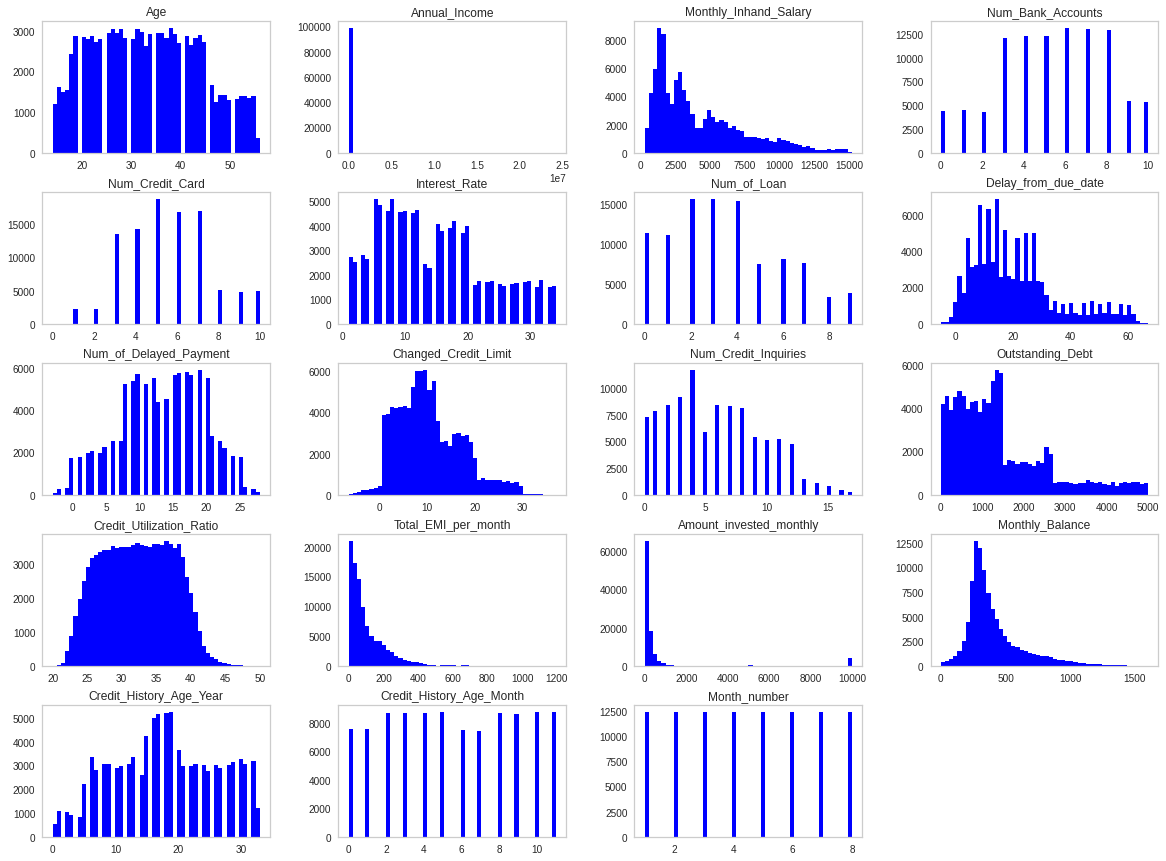

In [ ]:
cs_final.hist(bins=50, figsize=(20, 15), grid=False , color='blue')

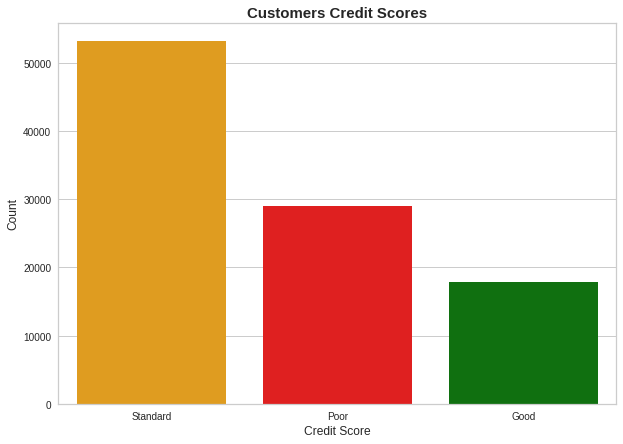

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=cs_final, x="Credit_Score",palette=['orange', 'red', 'green'])
plt.title("Customers Credit Scores", size=15, fontweight="bold")
plt.xlabel("Credit Score", size=12)
plt.ylabel("Count", size=12)
plt.show()

From the above graph, we see that most of the people fall under standard category. From this we can conclude that our dataset is imbbalanced, hence we will be using stratified method to split the train and test data.

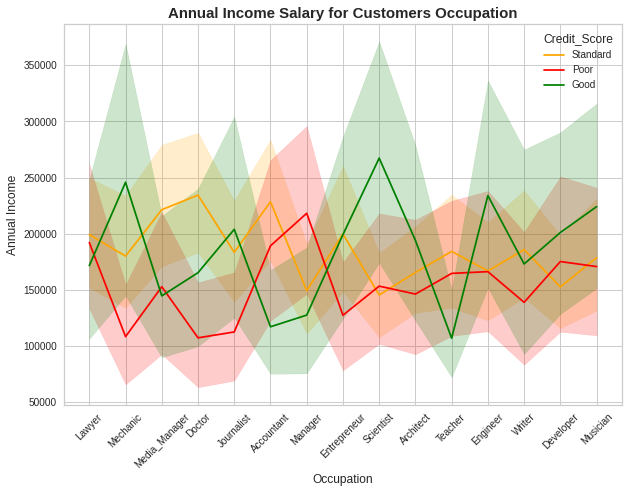

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=cs_final, x="Occupation", y="Annual_Income", hue="Credit_Score",palette=['orange', 'red', 'green'])
plt.xticks(rotation=45)
plt.title("Annual Income Salary for Customers Occupation", size=15, fontweight="bold")
plt.xlabel("Occupation", size=12)
plt.ylabel("Annual Income", size=12)
plt.show()

From the above graph, we can see that the annual income does not affectcredit score, beacause even people with less income have good credit score.

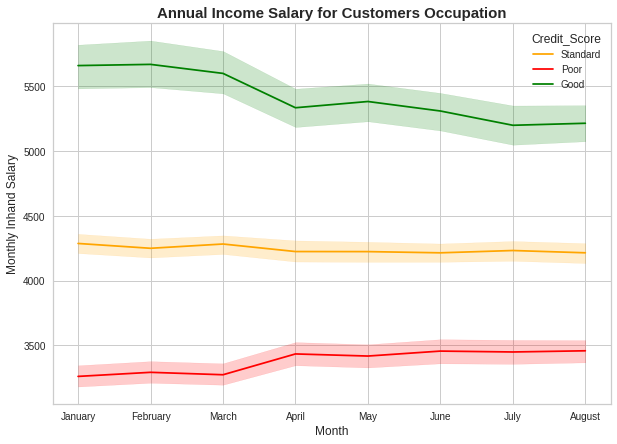

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=cs_final, x="Month", y="Monthly_Inhand_Salary", hue="Credit_Score",palette=['orange', 'red', 'green'])
plt.title("Annual Income Salary for Customers Occupation", size=15, fontweight="bold")
plt.xlabel("Month", size=12)
plt.ylabel("Monthly Inhand Salary", size=12)
plt.show()

The above chart shows that the people with high inhand salary has a good credit score compared to the people with less inhand salary

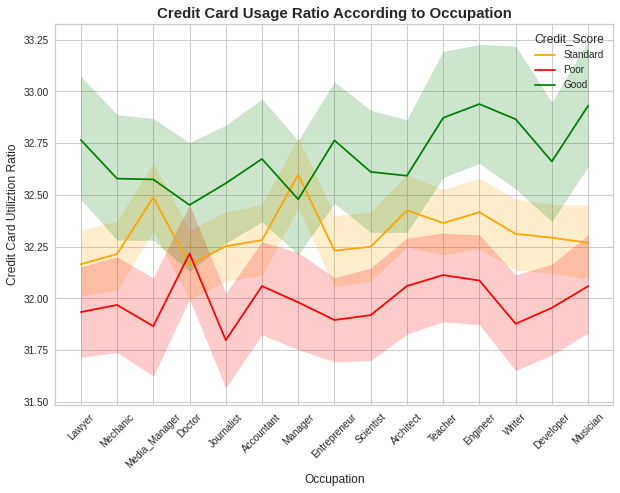

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=cs_final, x="Occupation", y="Credit_Utilization_Ratio", hue="Credit_Score",palette=['orange', 'red', 'green'])
plt.xticks(rotation=45)
plt.title("Credit Card Usage Ratio According to Occupation", size=15, fontweight="bold")
plt.xlabel("Occupation", size=12)
plt.ylabel("Credit Card Utiliztion Ratio", size=12)
plt.show()

The graph infers that, If the usage of the credit card is more, then the credit score will be good

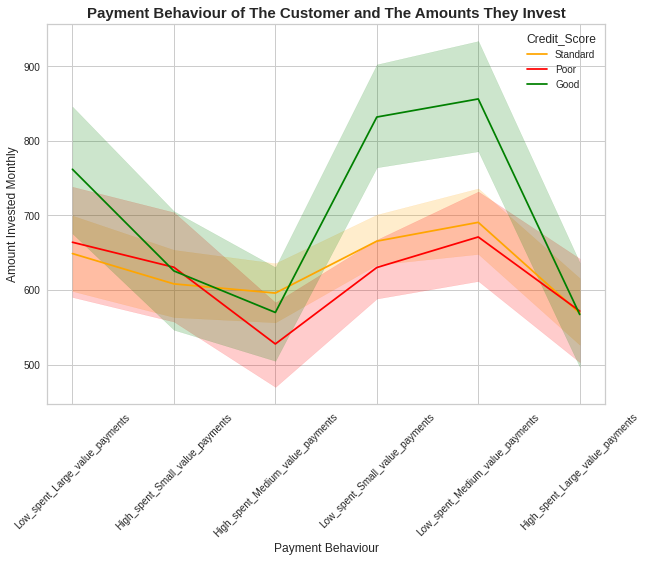

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(
    data=cs_final, x="Payment_Behaviour", y="Amount_invested_monthly", hue="Credit_Score",palette=['orange', 'red', 'green'])
plt.xticks(rotation=45)
plt.title(
    "Payment Behaviour of The Customer and The Amounts They Invest",
    size=15,
    fontweight="bold",
)
plt.xlabel("Payment Behaviour", size=12)
plt.ylabel("Amount Invested Monthly", size=12)
plt.show()

From the graph, it is clear that people investing monthly amount between 675 and 875 have a good credit score and people investing monthly between 600 and 750 have a standard credit score

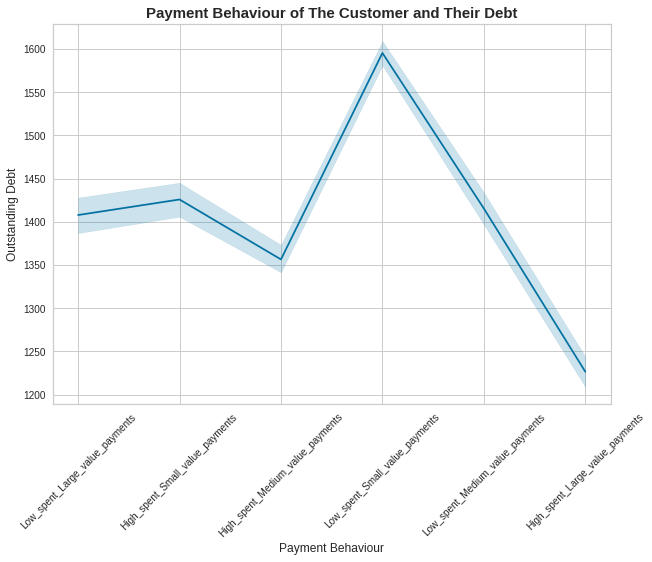

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=cs_final, x="Payment_Behaviour", y="Outstanding_Debt",palette=['orange', 'red', 'green'])
plt.xticks(rotation=45)
plt.title(
    "Payment Behaviour of The Customer and Their Debt", size=15, fontweight="bold"
)
plt.xlabel("Payment Behaviour", size=12)
plt.ylabel("Outstanding Debt", size=12)
plt.show()

The graph above illustrates the outstanding debts for each category of people based on their payment value. People who spend more and make a small value payments (High_spent_Small_value_payments) and people who spend less and make small value payments ( Low_spent_Small_value_payments) have a higher outstanding debts. On the other hand people who spend more and make a large value payments have a very low outstanding debts.

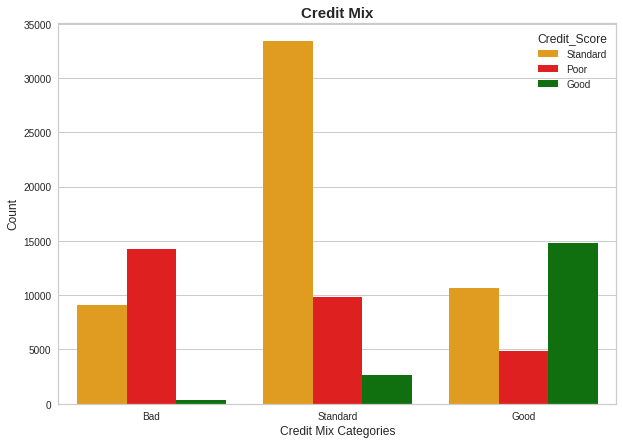

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=cs_final, x="Credit_Mix", hue="Credit_Score",palette=['orange', 'red', 'green'])
# plt.xticks(rotation=45)
plt.title("Credit Mix", size=15, fontweight="bold")
plt.xlabel("Credit Mix Categories", size=12)
plt.ylabel("Count", size=12)
plt.show()

This graph is about the credit mix (i.e) having different credit accounts such as mortgages, loans, credit cards, etc. People having a bad credit mix, will have a bad credit score. Peeople with standdard credit mix will have a standard credit score and people with good credit mix will have a good credit score.

In [ ]:
cs_final["Age_Group"] = pd.cut(
    cs_final.Age,
    bins=[14, 25, 30, 45, 55, 95, 120],
    labels=["14-25", "25-30", "30-45", "45-55", "55-95", "95-120"],
)
age_groups = (
    cs_final.groupby(["Age_Group", "Credit_Score"])[
        "Outstanding_Debt", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card"
    ]
    .sum()
    .reset_index()
)
age_groups

Age_Group Credit_Score  Outstanding_Debt  Annual_Income  Num_Bank_Accounts  \
0      14-25         Good        3222294.87   6.826860e+08              13871   
1      14-25         Poor       19586670.09   1.439845e+09              60775   
2      14-25     Standard       20511548.56   2.294454e+09              80572   
3      25-30         Good        1872170.87   3.521718e+08               8055   
4      25-30         Poor        9893819.02   8.186044e+08              30698   
5      25-30     Standard        9962102.65   1.425365e+09              42421   
6      30-45         Good        5849791.11   1.302158e+09              23934   
7      30-45         Poor       27739659.19   1.859401e+09              86652   
8      30-45     Standard       30508060.94   4.566845e+09             124946   
9      45-55         Good        3205307.12   9.118951e+08              14975   
10     45-55         Poor        1643347.54   3.204532e+08               6607   
11     45-55     Standard        5775891.25   1.356621e+09              33664   
12     55-95         Good          98153.75   4.674797e+07                360   
13     55-95         Poor          52396.44   2.750242e+06                153   
14     55-95     Standard         182338.94   7.917197e+07                950   
15    95-120         Good              0.00   0.000000e+00                  0   
16    95-120         Poor              0.00   0.000000e+00                  0   
17    95-120     Standard              0.00   0.000000e+00                  0   

    Num_Credit_Card  
0             15780  
1             60537  
2             79142  
3              9253  
4             30448  
5             42154  
6             29640  
7             87242  
8            124740  
9             18559  
10             9254  
11            36833  
12              493  
13              280  
14             1025  
15                0  
16                0  
17                0

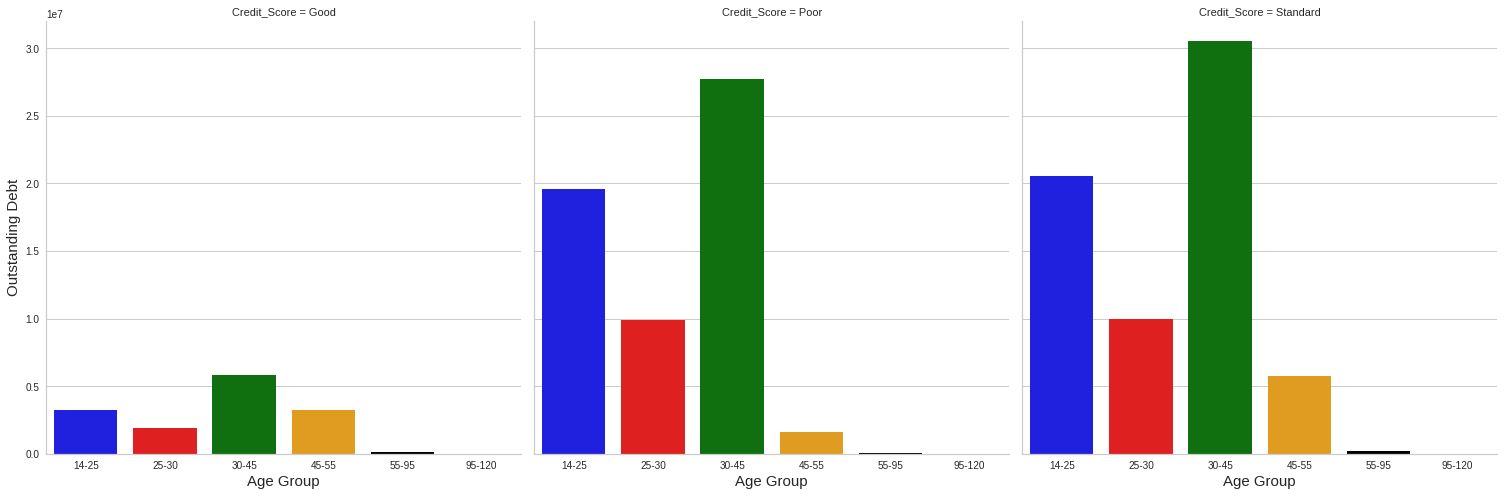

In [ ]:
g = sns.catplot(
    data=age_groups,
    x="Age_Group",
    y="Outstanding_Debt",
    height=7,
    aspect=1,
    col="Credit_Score",
    kind="bar",
    ci=None,
    palette=['blue', 'red', 'green','orange','black','yellow']
)
g.set_axis_labels("Age Group", "Outstanding Debt", size=15)

plt.show()

Form the graph we infer that teh customers between the age group 30 to 45 have poor and standard credit scores because of high outstanding debts.

## Data Preparation ******


In [ ]:
cs_final = pd.read_csv('cs_clean_no_outliers.csv')

In [ ]:
#cs_final = pd.read_csv('/content/sample_data/cs_clean_no_outliers.csv')

####Encoding categorical values to numeric values + Normalization + Optional One-hot Encoding

In [ ]:
cs_final_drop=cs_final.drop(['ID','Customer_ID','SSN','Name'],axis=1)

In [ ]:
cols = cs_final_drop.columns
num_cols = cs_final_drop._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [ ]:
#cs_final.select_dtypes(['object']).columns

In [ ]:

#one_hot_encoded_data = pd.get_dummies(cs_final_drop, columns =cat_cols)
#names = one_hot_encoded_data.columns
#X = pd.DataFrame(one_hot_encoded_data, columns = names)
#X.head()

# this replaces the code in green below
scaler = preprocessing.MinMaxScaler()
cs_final_drop['Credit_Score_Values'] = cs_final_drop['Credit_Score']
cs_final_drop.loc[:, num_cols]= scaler.fit_transform(cs_final_drop.loc[:, num_cols])
cs_final_drop.loc[:, cat_cols] = cs_final_drop.loc[:, cat_cols].apply(le().fit_transform)


In [ ]:
cs_final_drop.drop_duplicates(['Credit_Score_Values','Credit_Score'])[['Credit_Score_Values','Credit_Score']]

Credit_Score_Values  Credit_Score
0             Standard             2
22                Good             0
27                Poor             1

In [ ]:
cs_final_drop = cs_final_drop.drop("Credit_Score_Values", axis = 1)

In [ ]:
                    ### Optional one-hot Encoding
# X = cs_final_drop.drop(['Credit_Score'],axis=1)
#one_hot_encoded_data = pd.get_dummies(X, columns = cat_cols)
#scaler = preprocessing.MinMaxScaler()
#names = one_hot_encoded_data.columns
#one_hot_encoded_data.loc[:, num_cols]= scaler.fit_transform(one_hot_encoded_data.loc[:, num_cols])
#X = pd.DataFrame(one_hot_encoded_data, columns = names)
#X.head()

In [ ]:
#Month_le = le()
#Occupation_le = le()
#Type_of_Loan_le = le()
#Credit_Mix_le = le()
#Credit_History_Age_le = le()
#Payment_of_Min_Amount_le = le()
#Payment_Behaviour_le = le()
#Credit_Score_le = le()

In [ ]:
#cs_final['Month'] = Month_le.fit_transform(cs_final['Month'])
#cs_final['Occupation'] = Occupation_le.fit_transform(cs_final['Occupation'])
#cs_final['Credit_Mix'] = Credit_Mix_le.fit_transform(cs_final['Credit_Mix'])
#cs_final['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(cs_final['Payment_of_Min_Amount'])
#cs_final['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(cs_final['Payment_Behaviour'])
#cs_final['Credit_Score'] = Credit_Score_le.fit_transform(cs_final['Credit_Score'])

In [ ]:
#cs_final_drop=cs_final.drop(['ID','Customer_ID','SSN','Name'],axis=1)

## **Feature Selection Methods**

In [ ]:
X = cs_final_drop.drop(['Credit_Score'],axis=1)
y = cs_final_drop['Credit_Score']

### **Calculating Information Gain**

Month                       0.000000
Age                         0.025416
Occupation                  0.003643
Annual_Income               0.617517
Monthly_Inhand_Salary       0.615111
Num_Bank_Accounts           0.098673
Num_Credit_Card             0.114636
Interest_Rate               0.188467
Num_of_Loan                 0.079685
Delay_from_due_date         0.111853
Num_of_Delayed_Payment      0.083830
Changed_Credit_Limit        0.111631
Num_Credit_Inquiries        0.122887
Credit_Mix                  0.206228
Outstanding_Debt            0.608180
Credit_Utilization_Ratio    0.000000
Payment_of_Min_Amount       0.111648
Total_EMI_per_month         0.554080
Amount_invested_monthly     0.002823
Payment_Behaviour           0.008697
Monthly_Balance             0.027873
Credit_Score                0.096149
Credit_History_Age_Year     0.000000
Credit_History_Age_Month    0.004446
dtype: float64


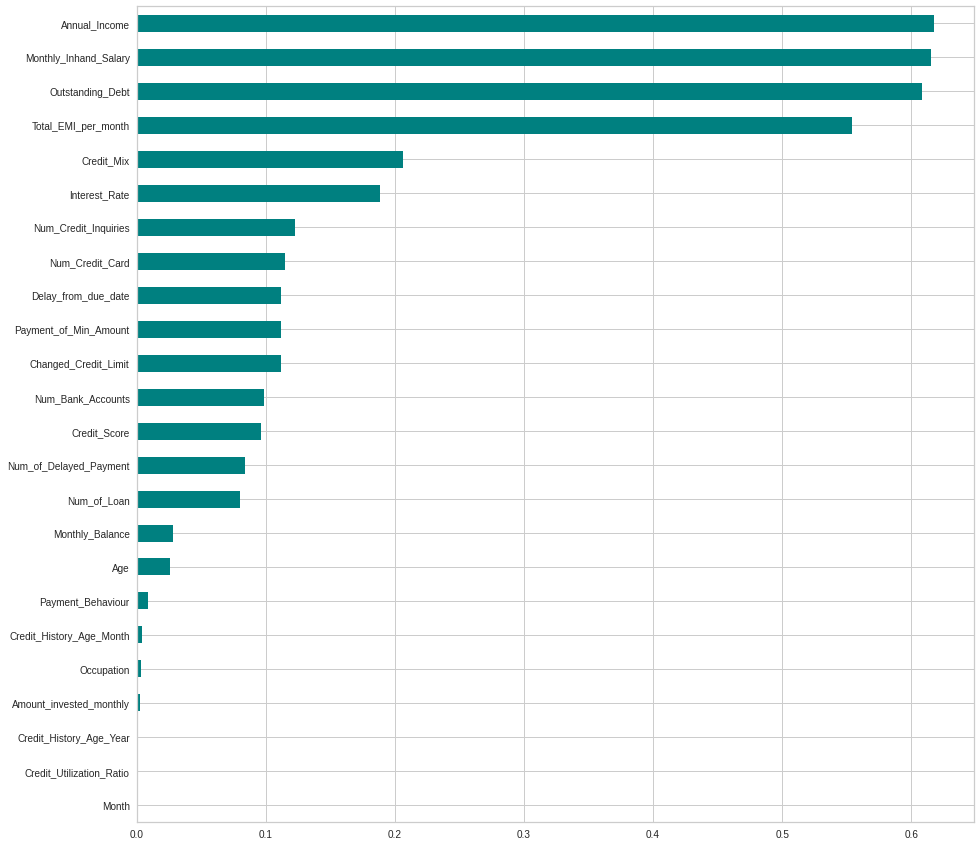

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importance= mutual_info_classif(X,y)
feature_important=pd.Series(importance,cs_final_drop.columns[0:len(cs_final_drop.columns)-1])
print(feature_important)
plt.figure(figsize = (15,15))
feature_important.sort_values(ascending=True).plot(kind='barh',color='teal')
plt.show()

In [ ]:
# These features will be dropped with 97% confidence (feature_important> 0.03)
Columns_Info_gain = feature_important[feature_important>=0.03].index
Columns_Info_gain

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Credit_Score'],
      dtype='object')

###  **Correlation Coefficient**

In [ ]:
round(abs(cs_final_drop.corr()['Credit_Score']*100).sort_values(ascending=False), 2)

Credit_Score                100.00
Credit_Mix                   31.55
Num_of_Delayed_Payment       19.59
Changed_Credit_Limit         18.97
Payment_of_Min_Amount        18.21
Num_Bank_Accounts            16.27
Delay_from_due_date           9.96
Interest_Rate                 9.58
Num_Credit_Card               9.23
Credit_History_Age_Year       8.31
Age                           5.69
Num_Credit_Inquiries          4.29
Num_of_Loan                   3.42
Month_number                  3.30
Payment_Behaviour             2.43
Outstanding_Debt              2.06
Monthly_Balance               1.71
Occupation                    1.12
Annual_Income                 1.02
Monthly_Inhand_Salary         0.98
Month                         0.64
Total_EMI_per_month           0.64
Amount_invested_monthly       0.44
Credit_Utilization_Ratio      0.24
Credit_History_Age_Month      0.03
Name: Credit_Score, dtype: float64

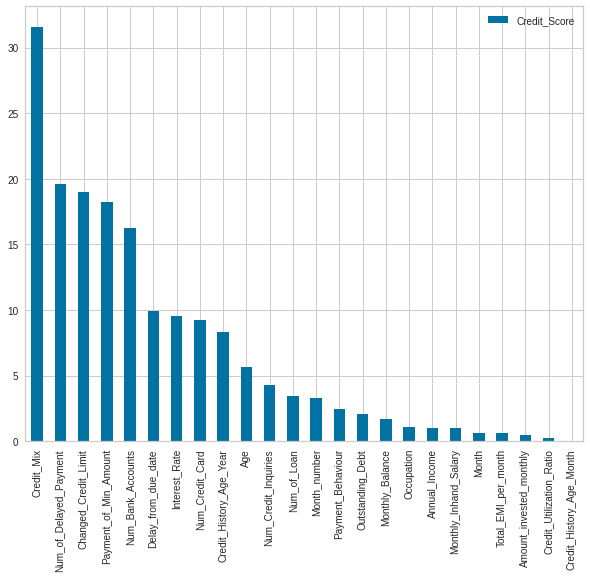

In [ ]:
pd.DataFrame(abs(cs_final_drop.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [ ]:
correlation=abs(cs_final_drop.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)

In [ ]:
# Features greater than 2%
correlation[correlation<2].index

Index(['Monthly_Balance', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Month', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Credit_Utilization_Ratio',
       'Credit_History_Age_Month'],
      dtype='object')

### **Using Xi-Square**

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

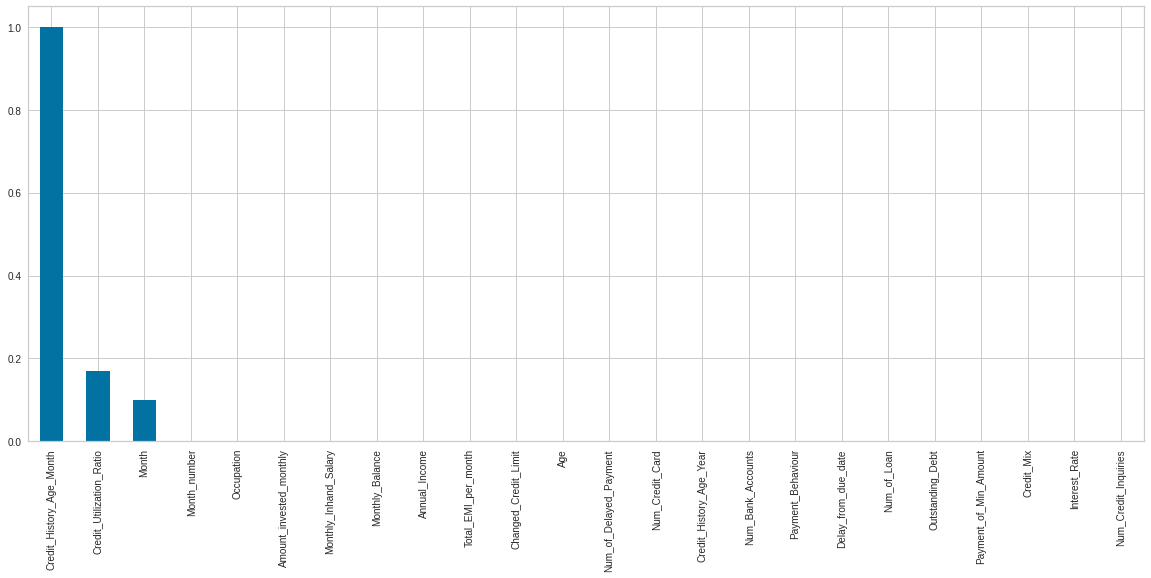

In [ ]:
p_values.plot.bar(figsize=(20,8))

In [ ]:
# These features will be dropped with 95% confidence (p_value<= 0.05)
p_values[p_values>0.05].index

Index(['Credit_History_Age_Month', 'Credit_Utilization_Ratio', 'Month'], dtype='object')

### Observation

From the above feature selection methods we found that the following parameters has less corelation and information gain. Hence removing these features from the dataset. Month, Occupation, Credit_history_age_month, Payment_Behaviour, Credit_Utilization_ratio and Amount_invested_monthly

In [ ]:
selected_features=cs_final_drop.drop(['Month','Occupation','Credit_Utilization_Ratio','Credit_History_Age_Month','Payment_Behaviour','Amount_invested_monthly'],axis=1)

In [ ]:
selected_features

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      0.261905       0.326121               0.333932                0.6   
1      0.261905       0.326121               0.333932                0.6   
2      0.285714       0.326121               0.333932                0.6   
3      0.285714       0.326121               0.333932                0.6   
4      0.285714       0.326121               0.333932                0.6   
5      0.285714       0.326121               0.333932                0.6   
6      0.285714       0.326121               0.333932                0.6   
7      0.285714       0.326121               0.333932                0.6   
8      0.690476       0.373670               0.415619                0.3   
9      0.714286       0.373670               0.415619                0.3   
...         ...            ...                    ...                ...   
66544  0.095238       0.387769               0.416405                0.6   
66545  0.095238       0.387769               0.416405                0.6   
66546  0.357143       0.247560               0.291276                0.8   
66547  0.357143       0.247560               0.291276                0.8   
66548  0.357143       0.247560               0.291276                0.8   
66549  0.357143       0.247560               0.291276                0.8   
66550  0.357143       0.247560               0.291276                0.8   
66551  0.357143       0.247560               0.291276                0.8   
66552  0.380952       0.247560               0.291276                0.8   
66553  0.380952       0.247560               0.291276                0.8   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  0.5       0.484848     0.444444             0.220339   
1                  0.5       0.484848     0.444444             0.220339   
2                  0.5       0.484848     0.444444             0.220339   
3                  0.5       0.484848     0.444444             0.254237   
4                  0.5       0.484848     0.444444             0.220339   
5                  0.5       0.484848     0.444444             0.135593   
6                  0.5       0.484848     0.444444             0.220339   
7                  0.5       0.484848     0.444444             0.169492   
8                  0.3       0.484848     0.333333             0.542373   
9                  0.3       0.484848     0.333333             0.542373   
...                ...            ...          ...                  ...   
66544              0.8       0.787879     0.888889             0.864407   
66545              0.8       0.787879     0.888889             0.864407   
66546              0.7       0.363636     0.666667             0.508475   
66547              0.7       0.363636     0.666667             0.474576   
66548              0.7       0.363636     0.666667             0.508475   
66549              0.7       0.363636     0.666667             0.406780   
66550              0.7       0.363636     0.666667             0.474576   
66551              0.7       0.363636     0.666667             0.474576   
66552              0.7       0.363636     0.666667             0.474576   
66553              0.7       0.363636     0.666667             0.474576   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    0.612903              0.461320              0.133333   
1                    0.612903              0.461320              0.133333   
2                    0.677419              0.461320              0.133333   
3                    0.677419              0.461320              0.133333   
4                    0.709677              0.461320              0.266667   
5                    0.677419              0.461320              0.266667   
6                    0.677419              0.461320              0.266667   
7                    0.677419              0.461320              0.26666

## **Data Preparation**

In [ ]:
#X = selected_features.drop(['Credit_Score'],axis=1)
#Y= selected_features['Credit_Score']


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y)
print("There are {} Training Data".format(X_train.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))
X_train

There are 46587 Training Data
There are 19967 Testing Data


Month       Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
60643      4  0.285714           3       0.073252               0.076595   
21249      2  0.547619          14       0.102989               0.107214   
45099      6  1.000000           1       0.580279               0.601148   
62896      2  0.428571          12       0.215373               0.234292   
7815       5  0.261905          11       0.289811               0.317537   
26134      5  0.238095           8       0.068272               0.109437   
51110      5  0.976190           3       0.023233               0.060907   
33286      1  0.595238          13       0.269973               0.287141   
20390      6  0.619048           1       0.015029               0.038410   
44968      1  0.571429           9       0.056709               0.071752   
...      ...       ...         ...            ...                    ...   
47567      3  0.190476           2       0.062525               0.082205   
46908      6  0.309524          12       0.183265               0.207725   
65669      6  0.166667           8       0.661022               0.648173   
57139      1  0.333333           6       0.188070               0.200023   
63150      6  0.476190           0       0.072503               0.078754   
29151      7  0.500000           8       1.000000               0.992600   
11076      6  0.880952          10       0.094968               0.101260   
50137      4  0.595238           9       0.385275               0.394598   
48763      1  0.404762           0       0.165519               0.160302   
2360       2  0.261905           4       0.191242               0.215852   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
60643                0.0              0.6       0.303030     0.222222   
21249                0.0              0.3       0.030303     0.444444   
45099                0.4              0.4       0.030303     0.444444   
62896                0.9              0.5       0.515152     0.222222   
7815                 0.6              0.4       0.545455     0.555556   
26134                0.8              1.0       0.636364     1.000000   
51110                0.7              0.4       0.060606     0.111111   
33286                0.8              0.4       0.363636     0.333333   
20390                0.3              0.4       0.787879     0.777778   
44968                0.9              0.9       0.545455     0.444444   
...                  ...              ...            ...          ...   
47567                0.7              0.3       0.272727     0.333333   
46908                0.9              1.0       0.939394     0.777778   
65669                0.6              0.5       0.454545     0.111111   
57139                0.6              0.5       0.151515     0.222222   
63150                0.3              0.7       0.272727     0.222222   
29151                0.4              0.5       0.575758     0.333333   
11076                0.3              0.3       0.151515     0.444444   
50137                0.3              0.6       0.242424     0.111111   
48763                0.8              0.7       0.939394     0.555556   
2360                 0.7              0.7       0.454545     0.444444   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
60643             0.271186                0.096774              0.292093   
21249             0.203390                0.290323              0.496303   
45099             0.186441                0.419355              0.248294   
62896             0.915254                0.709677              0.162400   
7815              0.559322                0.419355              0.484073   
26134             0.661017                0.870968              0.065984   
51110             0.305085                0.709677              0.503129   
33286             0.169492                0.387097              0.719283   
20390             0.440678                0

#### **Data Scaling**

In [ ]:
#from sklearn.preprocessing import StandardScaler


#scaler = StandardScaler()


#X_train = scaler.fit_transform(Xtrain)

#X_test = scaler.transform(Xtest)

In [ ]:
#X_train = pd.DataFrame(X_train, columns=[Xtrain.columns])

In [ ]:
#X_test = pd.DataFrame(X_test, columns=[Xtrain.columns])

## **Modeling**

### KNN

####KNN With Selected Features using Information gain

In [ ]:
X_train = X_train.drop(feature_important[feature_important<0.03].index, axis = 1)
X_test = X_test.drop(feature_important[feature_important<0.03].index, axis = 1)

In [ ]:
X_train 

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
5282        0.225411               0.257576                0.4   
44468       0.211862               0.248554                0.5   
3273        0.202982               0.241497                0.3   
40929       0.022920               0.043724                0.8   
41986       0.090652               0.117967                0.6   
2507        0.463947               0.486283                0.4   
54315       0.400018               0.396702                0.6   
65462       0.271819               0.305070                0.6   
5961        0.425902               0.420280                0.8   
63645       0.205250               0.201549                0.3   
...              ...                    ...                ...   
45474       0.470804               0.475662                0.7   
13125       0.186447               0.185127                0.7   
13526       0.061784               0.057355                0.8   
33064       0.289980               0.300063                1.0   
55735       0.262172               0.289671                0.5   
40688       0.148185               0.172602                0.8   
14468       0.269767               0.285404                0.8   
23796       0.288538               0.309379                0.5   
25365       0.074075               0.078601                0.6   
11803       0.297220               0.290757                0.8   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
5282               0.4       0.060606     0.444444             0.271186   
44468              0.6       0.121212     0.333333             0.288136   
3273               0.7       0.181818     0.333333             0.220339   
40929              0.7       0.303030     0.555556             0.186441   
41986              0.7       0.909091     0.555556             0.423729   
2507               0.4       0.121212     0.222222             0.169492   
54315              0.6       0.151515     0.444444             0.203390   
65462              1.0       0.848485     0.444444             0.898305   
5961               0.7       0.515152     0.444444             0.406780   
63645              0.5       0.090909     0.000000             0.220339   
...                ...            ...          ...                  ...   
45474              0.4       0.121212     0.222222             0.576271   
13125              1.0       0.969697     0.444444             0.847458   
13526              0.8       0.969697     0.888889             0.779661   
33064              0.6       0.818182     0.888889             0.728814   
55735              0.6       0.333333     0.000000             0.186441   
40688              0.7       0.333333     0.444444             0.542373   
14468              1.0       0.484848     0.888889             0.610169   
23796              0.5       0.454545     0.444444             0.271186   
25365              0.7       0.272727     0.333333             0.559322   
11803              0.3       0.272727     0.000000             0.355932   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
5282                 0.322581              0.229807              0.200000   
44468                0.387097              0.443970              0.133333   
3273                 0.387097              0.442264              0.266667   
40929                0.548387              0.559727              0.400000   
41986                0.709677              0.537827              0.466667   
2507                 0.032258              0.410694              0.266667   
54315                0.387097              0.496587              0.266667   
65462                0.645161              0.511945              0.533333   
5961                 0.322581              0.503982              0.266667   
63645                0.387097              0.316268              0.400000   
...                       ...                   ...     

**Finding the Best K-Value**

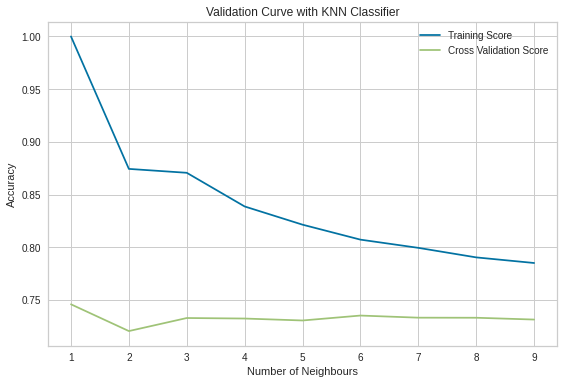

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Loading dataset


# X contains the data and y contains the labels
X, y = X_train, y_train

# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 10, 1)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y,
									param_name = "n_neighbors",
									param_range = parameter_range,
										cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
	label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)

y_pred_knn=knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

0.740121199979967


In [ ]:
import sklearn.metrics as metrics
precision = precision_score(y_test,y_pred_knn, average='macro')
recall = recall_score(y_test,y_pred_knn,average='macro')
f1_score = metrics.f1_score(y_test,y_pred_knn,average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Precision:  0.7147671160947523
Recall:  0.7749042216843466
F1_score:  0.7292827449637986


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68      3464
           1       0.68      0.83      0.75      5529
           2       0.89      0.67      0.76     10974

    accuracy                           0.74     19967
   macro avg       0.71      0.77      0.73     19967
weighted avg       0.78      0.74      0.74     19967



In [ ]:
from sklearn import metrics
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Good', 'Poor','Standard'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy KNeighborsClassifiern 88.30575053126408  Test Accuracy KNeighborsClassifiern 74.01211999799669


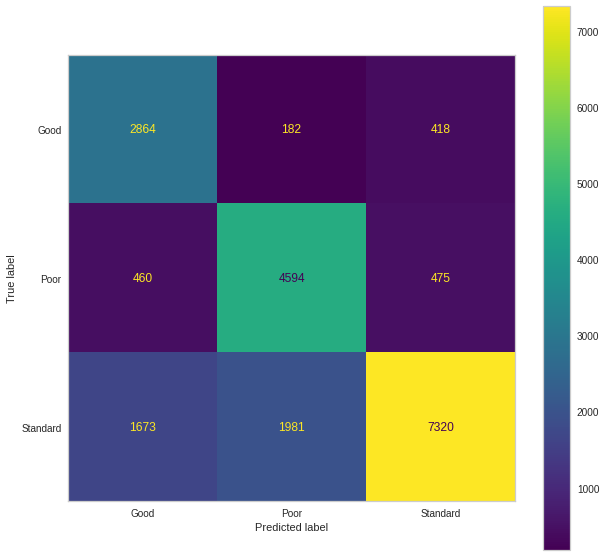

In [ ]:
evaluate_classification(knn_clf, "KNeighborsClassifiern", X_train,X_test,y_train,y_test)

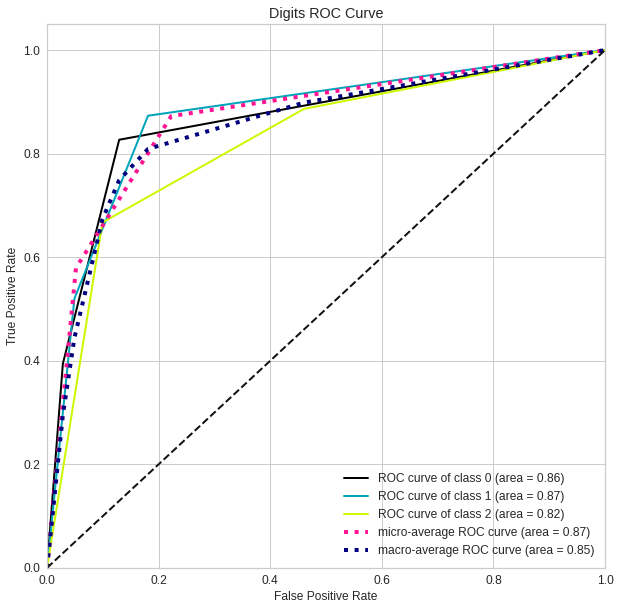

In [ ]:
Y_test_probs = knn_clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

#### KNN with selected features using Correlation

In [ ]:
X_train = X_train.drop(correlation[correlation<2].index, axis = 1)
X_test = X_test.drop(correlation[correlation<2].index, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)

y_pred_knn=knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

0.6677517904542495


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(y_test,y_pred_knn, average='macro')
recall = recall_score(y_test,y_pred_knn,average='macro')
f1_score = f1_score(y_test,y_pred_knn,average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Precision:  0.6461509671016112
Recall:  0.7007771438377602
F1_score:  0.6552936502208695


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.49      0.75      0.60      3464
           1       0.61      0.75      0.67      5529
           2       0.84      0.60      0.70     10974

    accuracy                           0.67     19967
   macro avg       0.65      0.70      0.66     19967
weighted avg       0.71      0.67      0.67     19967



Training Accuracy KNeighborsClassifiern 84.55577736278362  Test Accuracy KNeighborsClassifiern 66.77517904542495


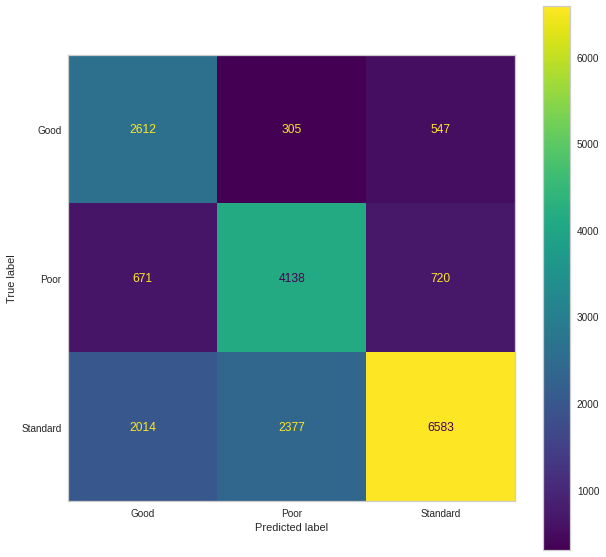

In [ ]:
evaluate_classification(knn_clf, "KNeighborsClassifiern", X_train,X_test,y_train,y_test)

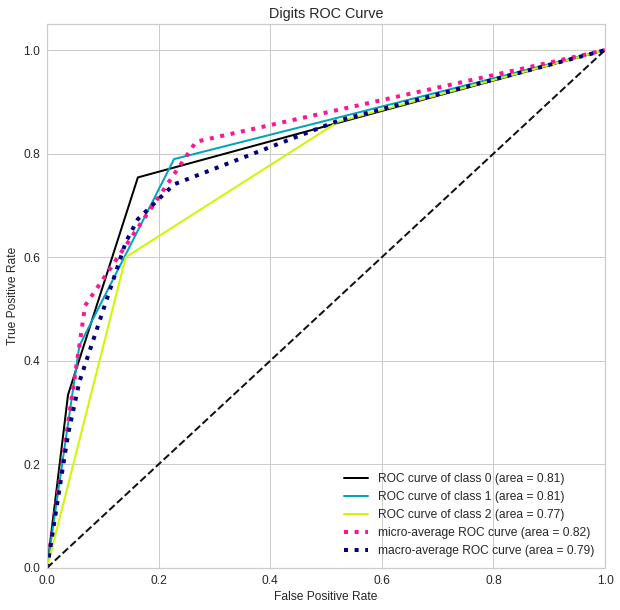

In [ ]:



# Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,stratify=Y)


Y_test_probs = knn_clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

#### KNN with selected features using Xi-Square

In [ ]:
X_train = X_train.drop(p_values[p_values>=0.05].index, axis = 1)
X_test = X_test.drop(p_values[p_values>=0.05].index, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)

y_pred_knn=knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

0.6699053438172985


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(y_test,y_pred_knn, average='macro')
recall = recall_score(y_test,y_pred_knn,average='macro')
f1_score = f1_score(y_test,y_pred_knn,average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Precision:  0.6472087586294859
Recall:  0.7005146226519563
F1_score:  0.6573239022099259


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      3464
           1       0.60      0.75      0.67      5529
           2       0.83      0.61      0.70     10974

    accuracy                           0.67     19967
   macro avg       0.65      0.70      0.66     19967
weighted avg       0.71      0.67      0.68     19967



Training Accuracy KNeighborsClassifiern 84.88634168330222  Test Accuracy KNeighborsClassifiern 66.99053438172984


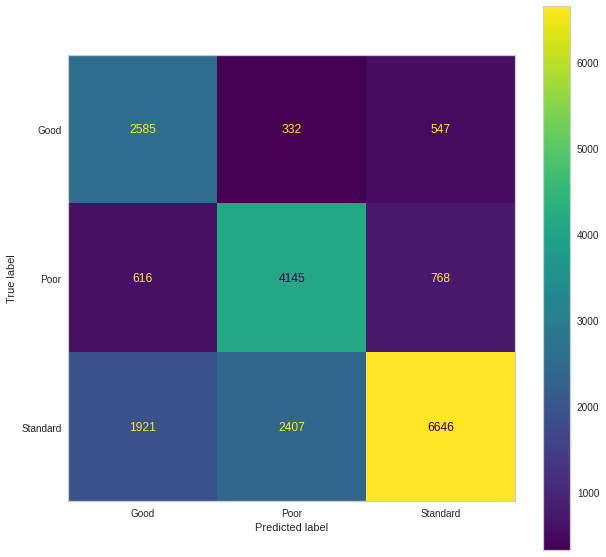

In [ ]:
evaluate_classification(knn_clf, "KNeighborsClassifiern", X_train,X_test,y_train,y_test)

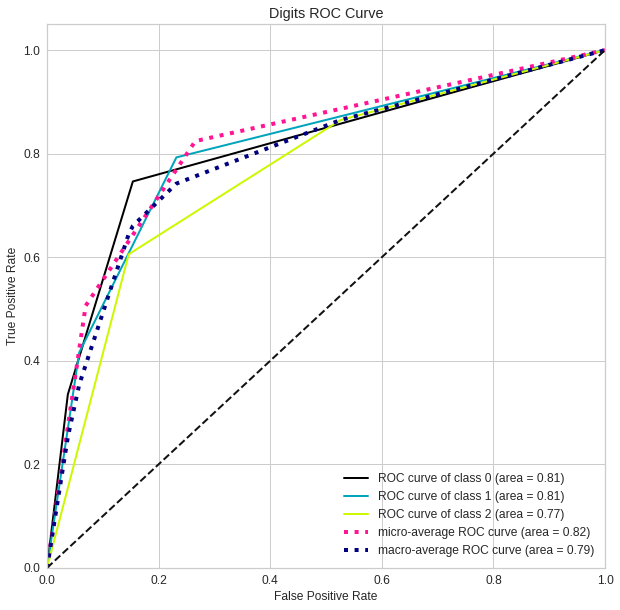

In [ ]:
Y_test_probs = knn_clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

#### KNN With All the Features

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)

y_pred_knn=knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

0.5893223819301848


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(y_test,y_pred_knn, average='macro')
recall = recall_score(y_test,y_pred_knn,average='macro')
f1_score = f1_score(y_test,y_pred_knn,average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Precision:  0.5729039308708964
Recall:  0.6189953629387608
F1_score:  0.5766026195703068


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.68      0.53      3464
           1       0.51      0.65      0.57      5529
           2       0.78      0.53      0.63     10974

    accuracy                           0.59     19967
   macro avg       0.57      0.62      0.58     19967
weighted avg       0.64      0.59      0.60     19967



Training Accuracy KNeighborsClassifiern 80.20048511387297  Test Accuracy KNeighborsClassifiern 58.932238193018485


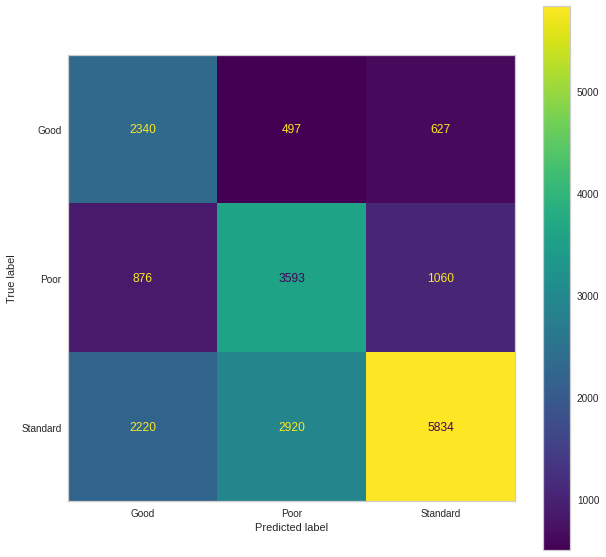

In [ ]:
evaluate_classification(knn_clf, "KNeighborsClassifiern", X_train,X_test,y_train,y_test)

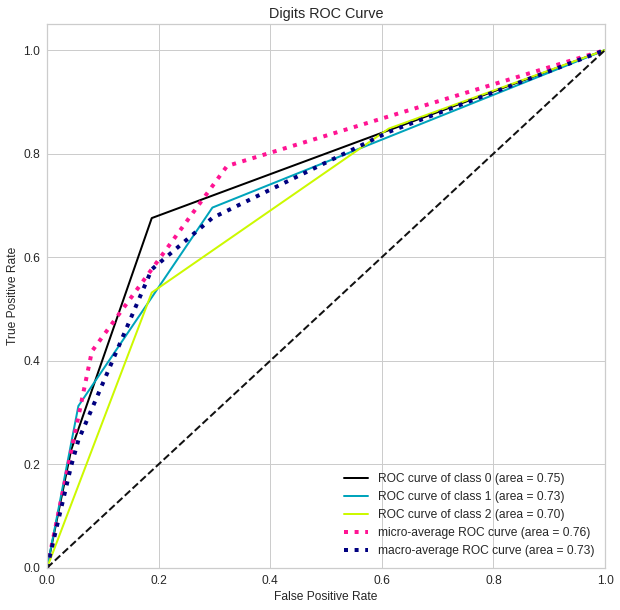

In [ ]:
Y_test_probs = knn_clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

### Decision Tree

#### Decision tree with selected features using information gain

In [ ]:
X_train = X_train.drop(feature_important[feature_important<0.03].index, axis = 1)
X_test = X_test.drop(feature_important[feature_important<0.03].index, axis = 1)

Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model.fit(X_train, y_train)
y_pred_DT = DT_model.predict(X_test)
print(accuracy_score(y_test, y_pred_DT))

0.7241448389843241


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT, average='macro')
recall = recall_score(y_test,y_pred_DT,average='macro')
f1_score= f1_score(y_test, y_pred_DT, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.6919961757333829
Recall:  0.7106310826621728
F1-Score:  0.6995144765307018


In [ ]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.57      0.68      0.62      3464
           1       0.71      0.70      0.71      5529
           2       0.79      0.75      0.77     10974

    accuracy                           0.72     19967
   macro avg       0.69      0.71      0.70     19967
weighted avg       0.73      0.72      0.73     19967



Training Accuracy DecisionTreeClassifier 73.53553566445575  Test Accuracy DecisionTreeClassifier 72.41448389843241


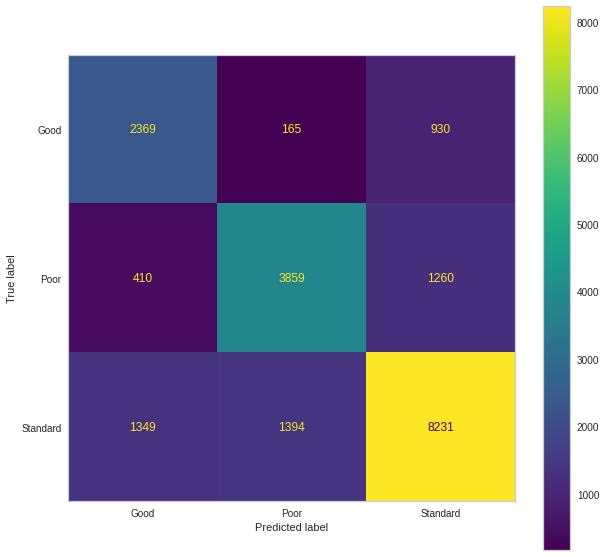

In [ ]:
evaluate_classification(DT_model, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

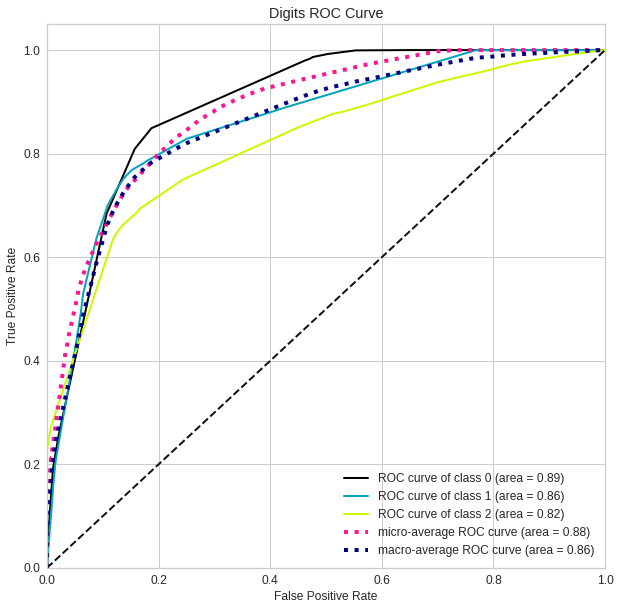

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs = DT_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model_gini.fit(X_train, y_train)
y_pred_DT_gini = DT_model_gini.predict(X_test)
print(accuracy_score(y_test, y_pred_DT_gini))

0.7247959132568739


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT_gini, average='macro')
recall = recall_score(y_test,y_pred_DT_gini,average='macro')
f1_score= f1_score(y_test, y_pred_DT_gini, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.6926760106519797
Recall:  0.7121811784622851
F1-Score:  0.7004227380392881


In [ ]:
print(classification_report(y_test,y_pred_DT_gini))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      3464
           1       0.72      0.70      0.71      5529
           2       0.79      0.75      0.77     10974

    accuracy                           0.72     19967
   macro avg       0.69      0.71      0.70     19967
weighted avg       0.73      0.72      0.73     19967



Training Accuracy DecisionTreeClassifier 73.65788739347887  Test Accuracy DecisionTreeClassifier 72.47959132568738


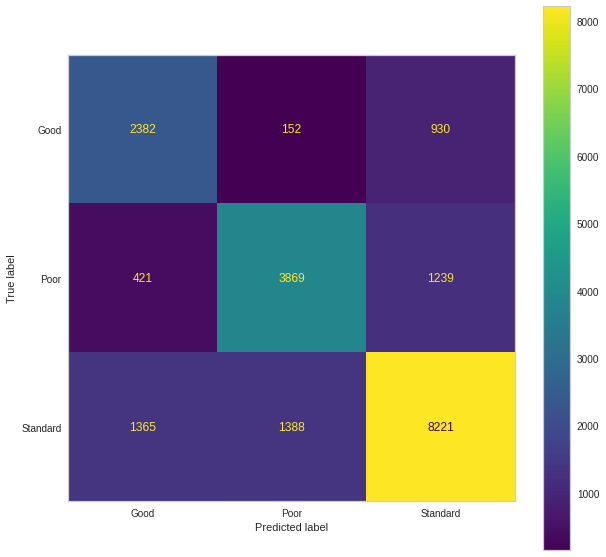

In [ ]:
evaluate_classification(DT_model_gini, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

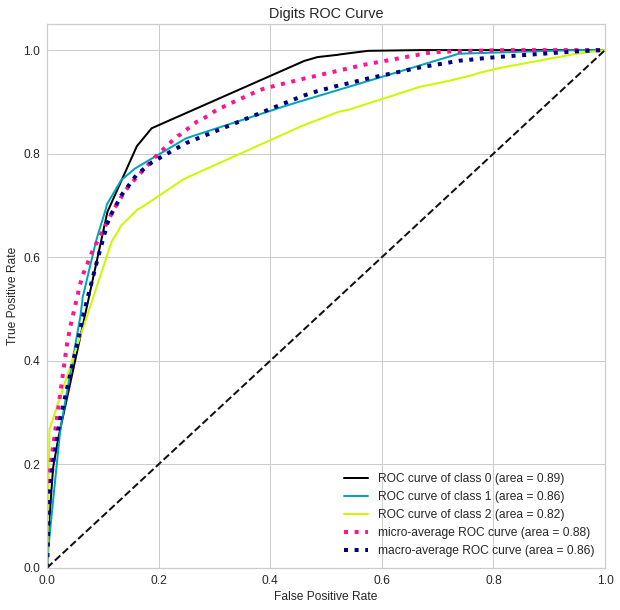

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs_gini = DT_model_gini.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs_gini,
                       title="Digits ROC Curve", figsize=(10,10));

#### Decision tree with selected features using Correlation

In [ ]:
X_train = X_train.drop(correlation[correlation<2].index, axis = 1)
X_test = X_test.drop(correlation[correlation<2].index, axis = 1)

Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model.fit(X_train, y_train)
y_pred_DT = DT_model.predict(X_test)
print(accuracy_score(y_test, y_pred_DT))

0.7314068212550708


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT, average='macro')
recall = recall_score(y_test,y_pred_DT,average='macro')
f1_score= f1_score(y_test, y_pred_DT, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.6990610435744283
Recall:  0.7202885663138229
F1-Score:  0.7079603817436463


In [ ]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63      3464
           1       0.72      0.73      0.72      5529
           2       0.80      0.75      0.77     10974

    accuracy                           0.73     19967
   macro avg       0.70      0.72      0.71     19967
weighted avg       0.74      0.73      0.73     19967



Training Accuracy DecisionTreeClassifier 73.08261961491404  Test Accuracy DecisionTreeClassifier 73.14068212550708


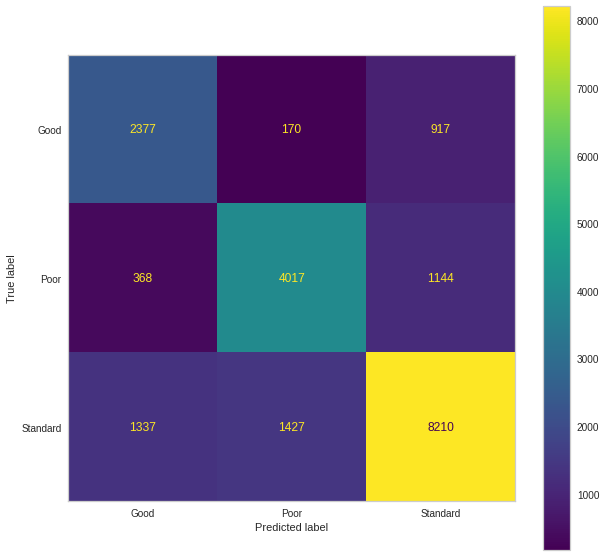

In [ ]:
evaluate_classification(DT_model, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

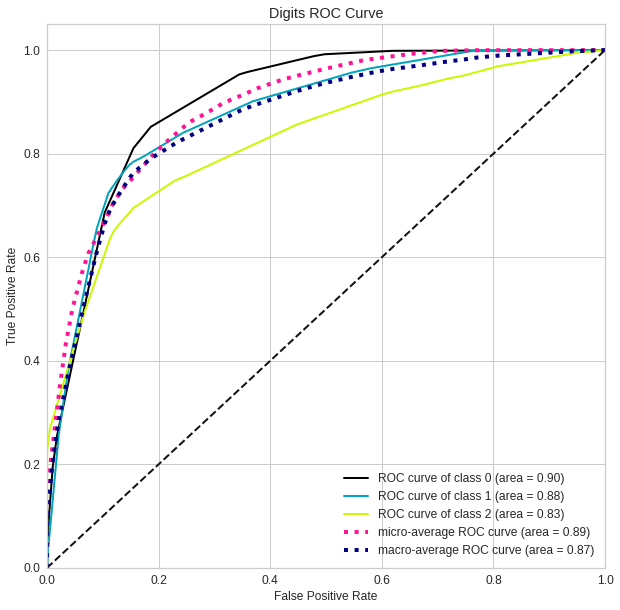

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs = DT_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model_gini.fit(X_train, y_train)
y_pred_DT_gini = DT_model_gini.predict(X_test)
print(accuracy_score(y_test, y_pred_DT_gini))

0.7339109530725697


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT_gini, average='macro')
recall = recall_score(y_test,y_pred_DT_gini,average='macro')
f1_score= f1_score(y_test, y_pred_DT_gini, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.7028519159888776
Recall:  0.7217970016063315
F1-Score:  0.7103051406324479


In [ ]:
print(classification_report(y_test,y_pred_DT_gini))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63      3464
           1       0.73      0.71      0.72      5529
           2       0.80      0.76      0.78     10974

    accuracy                           0.73     19967
   macro avg       0.70      0.72      0.71     19967
weighted avg       0.74      0.73      0.74     19967



Training Accuracy DecisionTreeClassifier 73.08261961491404  Test Accuracy DecisionTreeClassifier 73.14068212550708


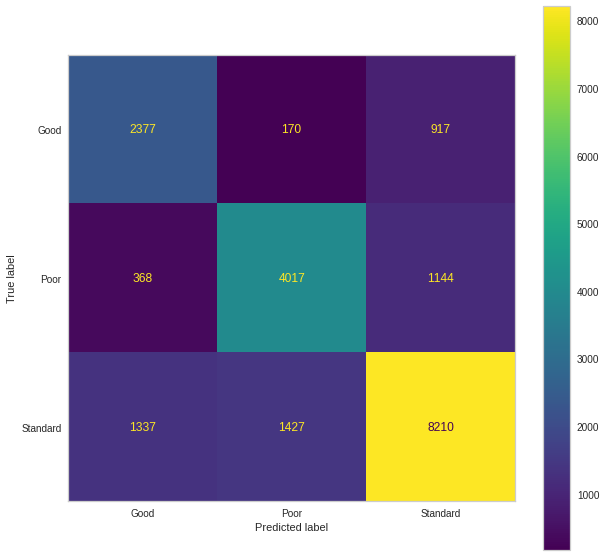

In [ ]:
evaluate_classification(DT_model, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

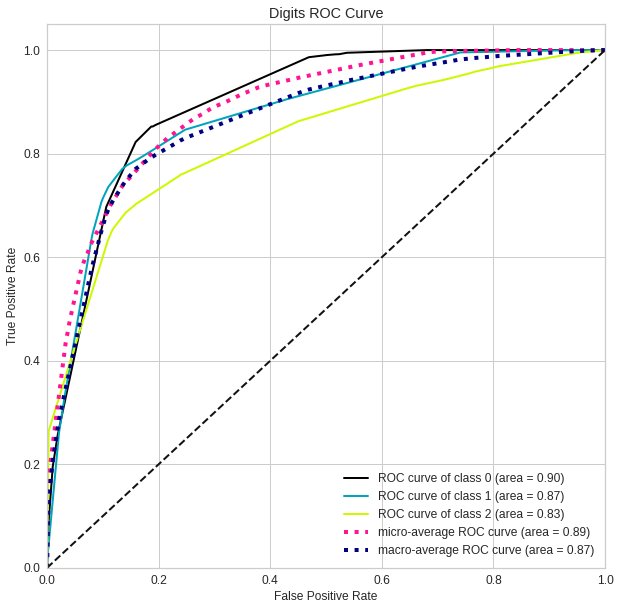

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs_gini = DT_model_gini.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs_gini,
                       title="Digits ROC Curve", figsize=(10,10));

#### Decision tree with selected features using Xi-Square

In [ ]:
X_train = X_train.drop(p_values[p_values>=0.05].index, axis = 1)
X_test = X_test.drop(p_values[p_values>=0.05].index, axis = 1)

Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model.fit(X_train, y_train)
y_pred_DT = DT_model.predict(X_test)
print(accuracy_score(y_test, y_pred_DT))

0.7283517804377222


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT, average='macro')
recall = recall_score(y_test,y_pred_DT,average='macro')
f1_score= f1_score(y_test, y_pred_DT, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.6963868616226382
Recall:  0.7158289606945255
F1-Score:  0.7036005046916557


In [ ]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63      3464
           1       0.73      0.70      0.71      5529
           2       0.79      0.75      0.77     10974

    accuracy                           0.73     19967
   macro avg       0.70      0.72      0.70     19967
weighted avg       0.74      0.73      0.73     19967



Training Accuracy DecisionTreeClassifier 73.51192392727584  Test Accuracy DecisionTreeClassifier 72.83517804377222


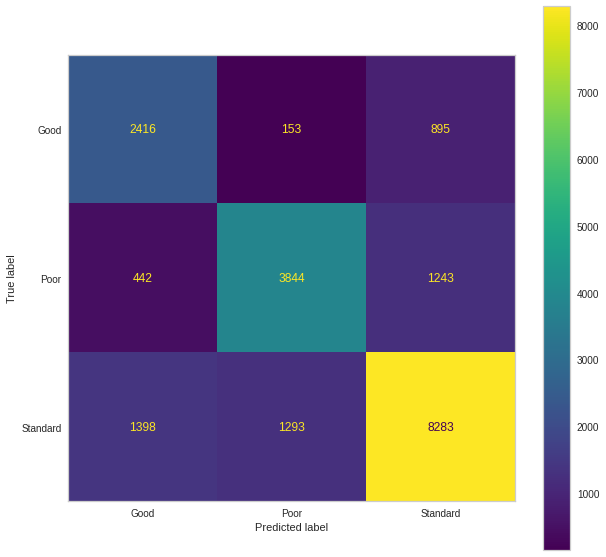

In [ ]:
evaluate_classification(DT_model, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

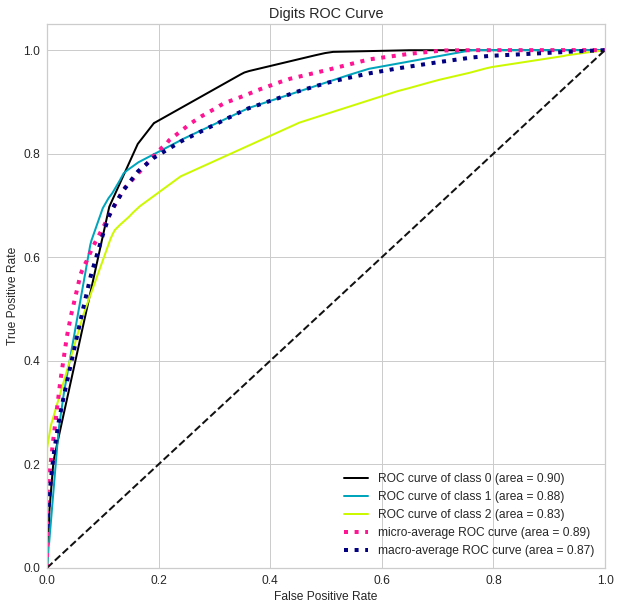

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs = DT_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model_gini.fit(X_train, y_train)
y_pred_DT_gini = DT_model_gini.predict(X_test)
print(accuracy_score(y_test, y_pred_DT_gini))

0.7292532678920218


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT_gini, average='macro')
recall = recall_score(y_test,y_pred_DT_gini,average='macro')
f1_score= f1_score(y_test, y_pred_DT_gini, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.6972895391019911
Recall:  0.7193442474391522
F1-Score:  0.7055294370343654


In [ ]:
print(classification_report(y_test,y_pred_DT_gini))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63      3464
           1       0.73      0.70      0.71      5529
           2       0.80      0.75      0.77     10974

    accuracy                           0.73     19967
   macro avg       0.70      0.72      0.71     19967
weighted avg       0.74      0.73      0.73     19967



Training Accuracy DecisionTreeClassifier 73.51192392727584  Test Accuracy DecisionTreeClassifier 72.83517804377222


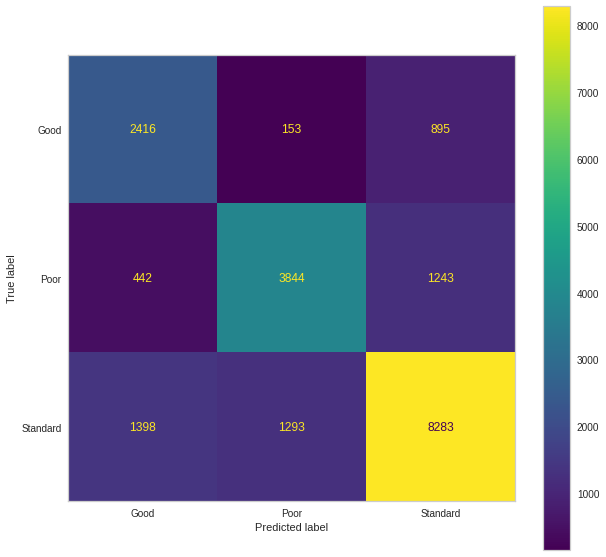

In [ ]:
evaluate_classification(DT_model, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

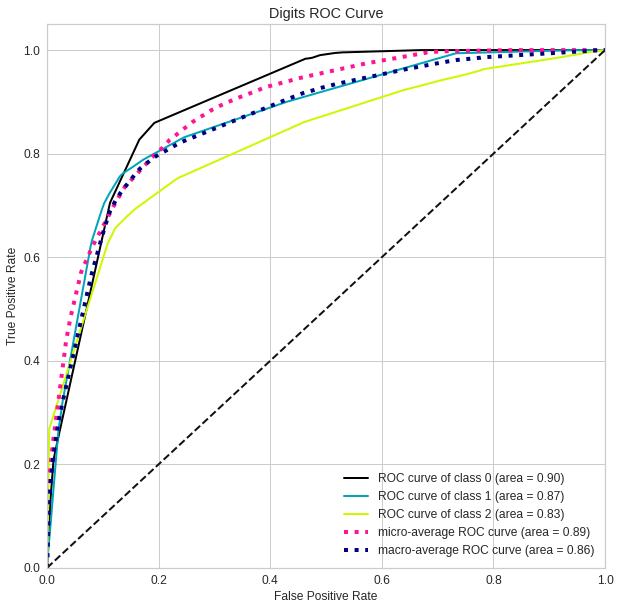

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs_gini = DT_model_gini.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs_gini,
                       title="Digits ROC Curve", figsize=(10,10));

#### Decision Tree With All Features

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
            max_depth = 5, min_samples_leaf = 5)
DT_model_gini.fit(X_train, y_train)
y_pred_DT_gini = DT_model_gini.predict(X_test)
print(accuracy_score(y_test, y_pred_DT_gini))

0.7298542595282216


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test,y_pred_DT_gini, average='macro')
recall = recall_score(y_test,y_pred_DT_gini,average='macro')
f1_score= f1_score(y_test, y_pred_DT_gini, average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1-Score: ',f1_score)

Precision:  0.697117078019744
Recall:  0.7138230642186429
F1-Score:  0.7040683134391204


In [ ]:
print(classification_report(y_test,y_pred_DT_gini))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62      3464
           1       0.72      0.71      0.72      5529
           2       0.79      0.76      0.78     10974

    accuracy                           0.73     19967
   macro avg       0.70      0.71      0.70     19967
weighted avg       0.74      0.73      0.73     19967



Training Accuracy DecisionTreeClassifier 73.55270783695022  Test Accuracy DecisionTreeClassifier 72.98542595282215


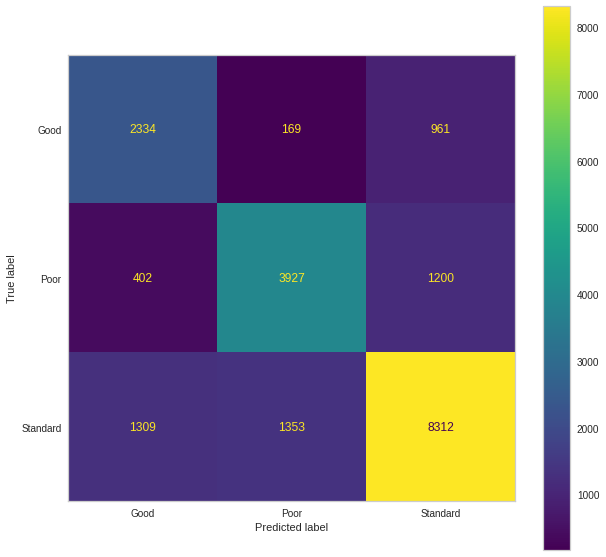

In [ ]:
evaluate_classification(DT_model_gini, "DecisionTreeClassifier", X_train,X_test,y_train,y_test)

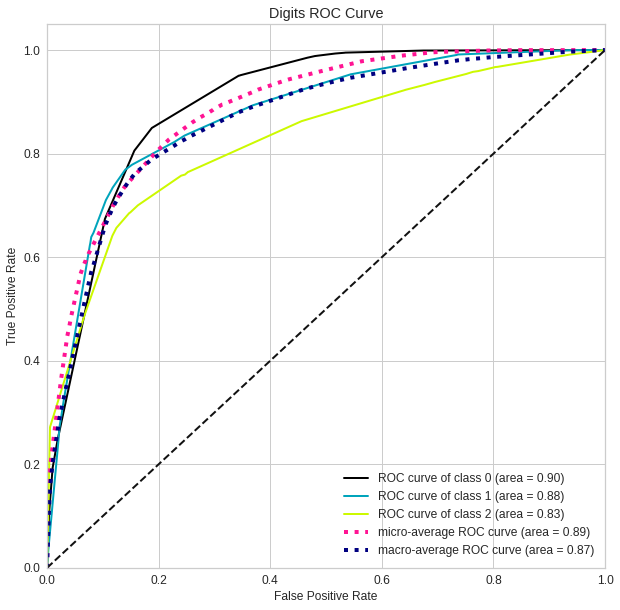

In [ ]:
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt

Y_test_probs_gini = DT_model_gini.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs_gini,
                       title="Digits ROC Curve", figsize=(10,10));

### XGBoost

XGBoost with selected features using Xi-square feature selection

In [ ]:
X_train_XI = X_train.drop(p_values[p_values>0.05].index, axis = 1)
X_test_XI = X_test.drop(p_values[p_values>0.05].index, axis = 1)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(X_train_XI , y_train)
y_pred_xgb_XI = xgb.predict(X_test_XI)

In [ ]:
confusion_mat_xgb= pd.DataFrame(confusion_matrix(y_test, y_pred_xgb_XI), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_xgb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2544             69                851
True[poor]                443           3896               1190
True[standard]           1415           1253               8306

In [ ]:
print(classification_report(y_test, y_pred_xgb_XI, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.58      0.73      0.65      3464
        poor       0.75      0.70      0.73      5529
    standard       0.80      0.76      0.78     10974

    accuracy                           0.74     19967
   macro avg       0.71      0.73      0.72     19967
weighted avg       0.75      0.74      0.74     19967



In [ ]:
precision_Xi = precision_score(y_test,y_pred_xgb_XI, average='macro')
recall_Xi = recall_score(y_test,y_pred_xgb_XI,average='macro')
f1_score_Xi = f1_score(y_test,y_pred_xgb_XI,average='macro')
print('Precision: ',precision_Xi)
print('Recall: ',recall_Xi)
print('F1_score: ',f1_score_Xi)

Precision:  0.7091033697369159
Recall:  0.7319797339584295
F1_score:  0.7170039875129796


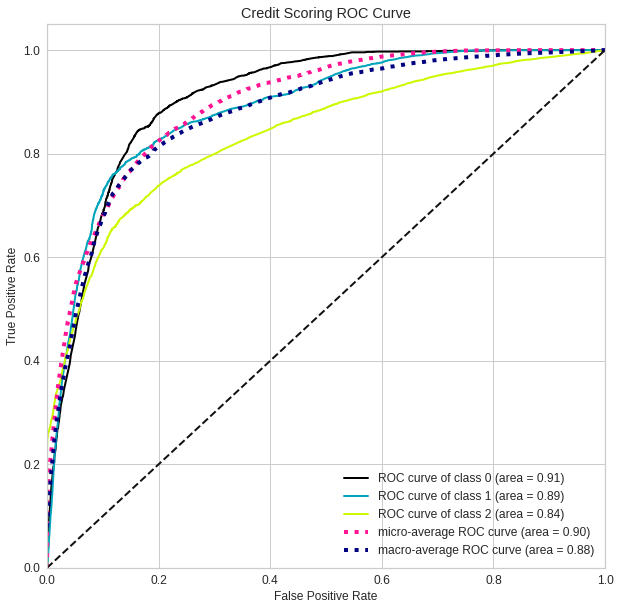

In [ ]:
y_pred_xgb_p = xgb.predict_proba(X_test_XI)
skplt.metrics.plot_roc_curve(y_test, y_pred_xgb_p, title="Credit Scoring ROC Curve", figsize=(10,10))

 XGBoost with selected features using information gain feature selection

In [ ]:
X_train_IG = X_train.drop(feature_important[feature_important<0.03].index, axis = 1)
X_test_IG = X_test.drop(feature_important[feature_important<0.03].index, axis = 1)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(X_train_IG , y_train)
y_pred_xgb_IG = xgb.predict(X_test_IG)

In [ ]:
confusion_mat_xgb= pd.DataFrame(confusion_matrix(y_test, y_pred_xgb_IG), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_xgb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2544             66                854
True[poor]                443           3887               1199
True[standard]           1412           1249               8313

In [ ]:
precision_IG = precision_score(y_test,y_pred_xgb_IG, average='macro')
recall_IG = recall_score(y_test,y_pred_xgb_IG,average='macro')
f1_score_IG = f1_score(y_test,y_pred_xgb_IG,average='macro')
print('Precision: ',precision_IG)
print('Recall: ',recall_IG)
print('F1_score: ',f1_score_IG)

Precision:  0.7091581806393524
Recall:  0.7316497641384472
F1_score:  0.7168749165975162


In [ ]:
print(classification_report(y_test, y_pred_xgb_IG, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.58      0.73      0.65      3464
        poor       0.75      0.70      0.72      5529
    standard       0.80      0.76      0.78     10974

    accuracy                           0.74     19967
   macro avg       0.71      0.73      0.72     19967
weighted avg       0.75      0.74      0.74     19967



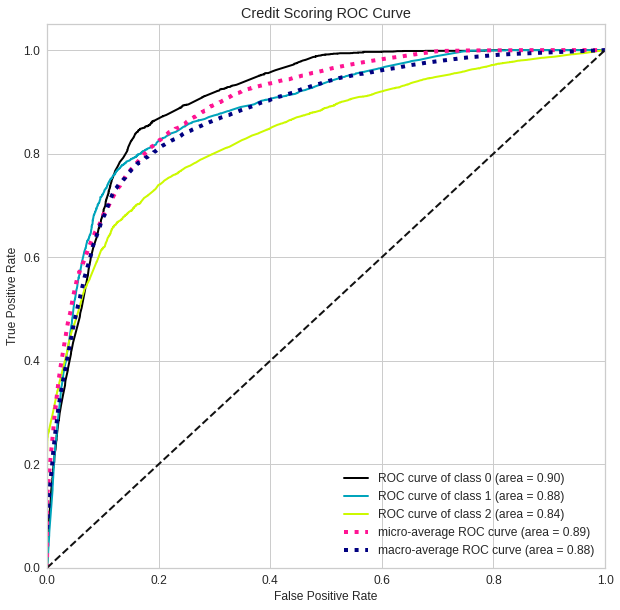

In [ ]:
y_pred_xgb_p = xgb.predict_proba(X_test_IG)
skplt.metrics.plot_roc_curve(y_test, y_pred_xgb_p, title="Credit Scoring ROC Curve", figsize=(10,10))

XGBoost with all the features

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(X_train , y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
confusion_mat_xgb= pd.DataFrame(confusion_matrix(y_test, y_pred_xgb), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_xgb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2544             69                851
True[poor]                443           3895               1191
True[standard]           1415           1252               8307

In [ ]:
print(classification_report(y_test, y_pred_xgb, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.58      0.73      0.65      3464
        poor       0.75      0.70      0.72      5529
    standard       0.80      0.76      0.78     10974

    accuracy                           0.74     19967
   macro avg       0.71      0.73      0.72     19967
weighted avg       0.75      0.74      0.74     19967



In [ ]:
precision = precision_score(y_test,y_pred_xgb, average='macro')
recall = recall_score(y_test,y_pred_xgb,average='macro')
f1_score = f1_score(y_test,y_pred_xgb,average='macro')
print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',f1_score)

Precision:  0.7091153916981563
Recall:  0.7319498206062859
F1_score:  0.7169938330512579


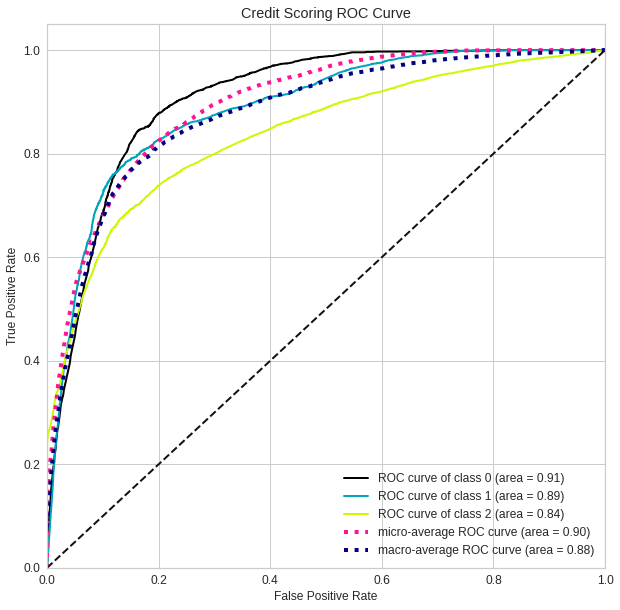

In [ ]:
y_pred__xgb_p = xgb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred__xgb_p, title="Credit Scoring ROC Curve", figsize=(10,10))

XGBoost with selected features using Correlation 

In [ ]:
X_train_C = X_train.drop(correlation[correlation<2].index, axis = 1)
X_test_C = X_test.drop(correlation[correlation<2].index, axis = 1)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(X_train_C , y_train)
y_pred_xgb_C = xgb.predict(X_test_C)

In [ ]:
confusion_mat_xgb= pd.DataFrame(confusion_matrix(y_test, y_pred_xgb_C), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_xgb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2546             65                853
True[poor]                444           3898               1187
True[standard]           1418           1243               8313

In [ ]:
print(classification_report(y_test, y_pred_xgb_C, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.58      0.73      0.65      3464
        poor       0.75      0.71      0.73      5529
    standard       0.80      0.76      0.78     10974

    accuracy                           0.74     19967
   macro avg       0.71      0.73      0.72     19967
weighted avg       0.75      0.74      0.74     19967



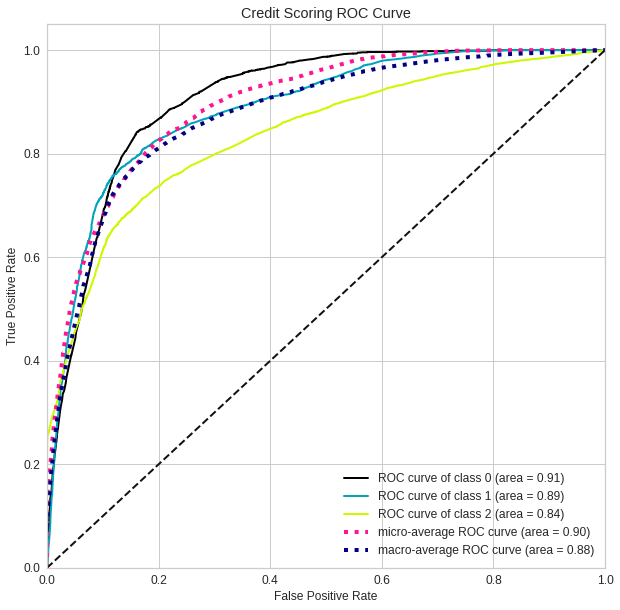

In [ ]:
y_pred__xgb_p = xgb.predict_proba(X_test_C)
skplt.metrics.plot_roc_curve(y_test, y_pred__xgb_p, title="Credit Scoring ROC Curve", figsize=(10,10))

## Naive Bayes (FAIZA)


#### Modeling without feature selection

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [ ]:
confusion_mat_gnb = pd.DataFrame(confusion_matrix(y_test, y_pred_gnb), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_gnb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2858             35                571
True[poor]                896           3752                881
True[standard]           2171           1593               7210

In [ ]:
print(classification_report(y_test, y_pred_gnb, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.48      0.83      0.61      3464
        poor       0.70      0.68      0.69      5529
    standard       0.83      0.66      0.73     10974

    accuracy                           0.69     19967
   macro avg       0.67      0.72      0.68     19967
weighted avg       0.73      0.69      0.70     19967



In [ ]:
precision_gnb = precision_score(y_test,y_pred_gnb, average='macro')
recall_gnb = recall_score(y_test,y_pred_gnb,average='macro')
f1_score_gnb = f1_score(y_test,y_pred_gnb,average='macro')
print('Precision: ',precision_gnb)
print('Recall: ',recall_gnb)
print('F1_score: ',f1_score_gnb)

Precision:  0.6707106385188056
Recall:  0.7202229782456526
F1_score:  0.6770117930573475


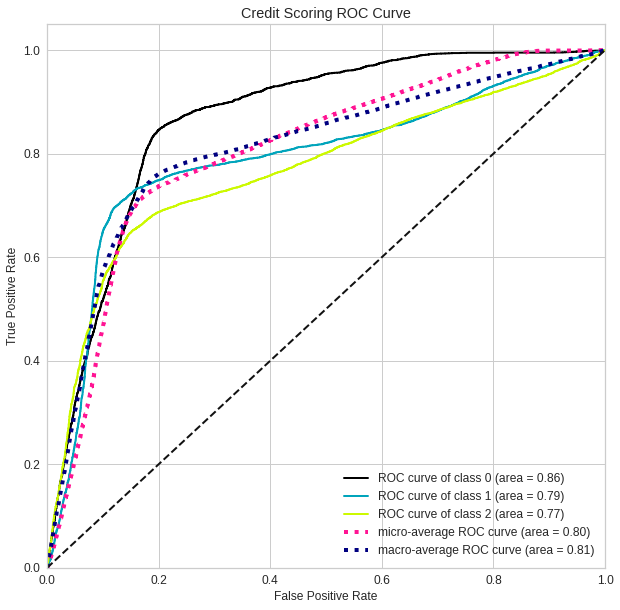

In [ ]:
y_pred__gnb_p = gnb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred__gnb_p, title="Credit Scoring ROC Curve", figsize=(10,10))

#### Modeling with Feature Selection Xi-square

In [ ]:
X_train_Xi = X_train.drop(p_values[p_values>0.05].index, axis = 1)
X_test_Xi = X_test.drop(p_values[p_values>0.05].index, axis = 1)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_Xi, y_train)
y_pred_gnb_Xi = gnb.predict(X_test_Xi)

In [ ]:
confusion_mat_gnb = pd.DataFrame(confusion_matrix(y_test, y_pred_gnb_Xi), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_gnb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2858             35                571
True[poor]                896           3751                882
True[standard]           2172           1592               7210

In [ ]:
print(classification_report(y_test, y_pred_gnb_Xi, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.48      0.83      0.61      3464
        poor       0.70      0.68      0.69      5529
    standard       0.83      0.66      0.73     10974

    accuracy                           0.69     19967
   macro avg       0.67      0.72      0.68     19967
weighted avg       0.73      0.69      0.70     19967



In [ ]:
precision_Xi = precision_score(y_test,y_pred_gnb_Xi, average='macro')
recall_Xi = recall_score(y_test,y_pred_gnb_Xi,average='macro')
f1_score_Xi = f1_score(y_test,y_pred_gnb_Xi,average='macro')
print('Precision: ',precision_Xi)
print('Recall: ',recall_Xi)
print('F1_score: ',f1_score_Xi)

Precision:  0.6706759479031819
Recall:  0.7201626900681642
F1_score:  0.6769586377041122


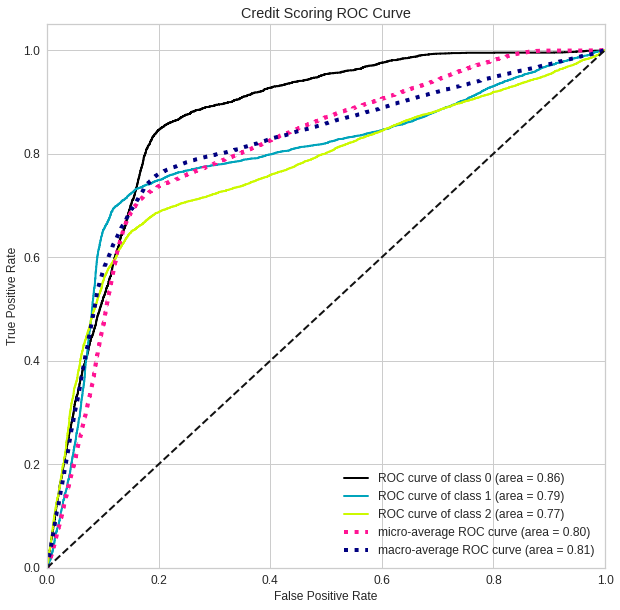

In [ ]:
y_pred_gnb_p = gnb.predict_proba(X_test_Xi)
skplt.metrics.plot_roc_curve(y_test, y_pred_gnb_p, title="Credit Scoring ROC Curve", figsize=(10,10))

#### Modeling with Feature Selection Information Gain

In [ ]:
X_train_IG = X_train.drop(feature_important[feature_important<0.03].index, axis = 1)
X_test_IG = X_test.drop(feature_important[feature_important<0.03].index, axis = 1)

In [ ]:
X_train_IG

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
15039       0.184459               0.209415                0.6   
48755       0.059714               0.064346                0.5   
51033       0.161854               0.157368                0.5   
64234       0.115317               0.124236                0.6   
59742       0.243586               0.279770                0.3   
31593       0.017154               0.052694                0.7   
36495       0.316241               0.321627                0.8   
9963        0.276427               0.297514                0.7   
12728       0.077734               0.108119                0.3   
17991       0.000585               0.002512                0.8   
...              ...                    ...                ...   
48598       0.073242               0.118090                0.4   
12138       0.018432               0.044665                0.5   
31518       0.496500               0.486953                0.8   
4266        0.064692               0.103348                0.5   
14439       0.129815               0.165897                0.4   
64477       0.203636               0.222200                0.7   
23248       0.166176               0.166831                0.1   
11668       0.197369               0.206130                0.7   
63603       0.217629               0.254074                0.6   
64338       0.063569               0.058604                0.8   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
15039              0.9       0.727273     0.222222             0.745763   
48755              0.7       0.575758     0.444444             0.440678   
51033              0.3       0.060606     0.111111             0.305085   
64234              0.6       0.181818     0.444444             0.169492   
59742              0.2       0.181818     0.111111             0.135593   
31593              0.9       1.000000     1.000000             0.406780   
36495              0.7       0.212121     0.555556             0.288136   
9963               0.7       0.757576     0.666667             0.508475   
12728              0.3       0.212121     0.555556             0.254237   
17991              0.5       0.393939     0.666667             0.593220   
...                ...            ...          ...                  ...   
48598              0.4       0.484848     0.444444             0.186441   
12138              0.7       0.393939     0.555556             0.271186   
31518              0.6       0.212121     0.222222             0.372881   
4266               0.5       0.727273     0.555556             0.254237   
14439              0.4       0.515152     0.333333             0.237288   
64477              0.6       0.121212     0.444444             0.423729   
23248              0.3       0.242424     0.222222             0.152542   
11668              0.6       0.515152     0.333333             0.525424   
63603              1.0       0.454545     0.333333             0.305085   
64338              0.6       0.454545     0.888889             1.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
15039                0.903226              0.403015              0.466667   
48755                0.548387              0.389647              0.600000   
51033                0.354839              0.259386              0.200000   
64234                0.741935              0.459329              0.133333   
59742                0.322581              0.370307              0.066667   
31593                0.806452              0.761661              0.733333   
36495                0.612903              0.642776              0.533333   
9963                 0.677419              0.412400              0.600000   
12728                0.548387              0.771047              0.333333   
17991                0.387097              0.333618              0.533333   
...                       ...                   ...     

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_IG, y_train)
y_pred_gnb_IG = gnb.predict(X_test_IG)

In [ ]:
confusion_mat_gnb = pd.DataFrame(confusion_matrix(y_test, y_pred_gnb_IG), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_gnb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2839             29                596
True[poor]                890           3603               1036
True[standard]           2108           1417               7449

In [ ]:
print(classification_report(y_test, y_pred_gnb_IG, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.49      0.82      0.61      3464
        poor       0.71      0.65      0.68      5529
    standard       0.82      0.68      0.74     10974

    accuracy                           0.70     19967
   macro avg       0.67      0.72      0.68     19967
weighted avg       0.73      0.70      0.70     19967



In [ ]:
precision_IG = precision_score(y_test,y_pred_gnb_IG, average='macro')
recall_IG = recall_score(y_test,y_pred_gnb_IG,average='macro')
f1_score_IG = f1_score(y_test,y_pred_gnb_IG,average='macro')
print('Precision: ',precision_IG)
print('Recall: ',recall_IG)
print('F1_score: ',f1_score_IG)

Precision:  0.6734235847278076
Recall:  0.7166712935730595
F1_score:  0.6781847731536356


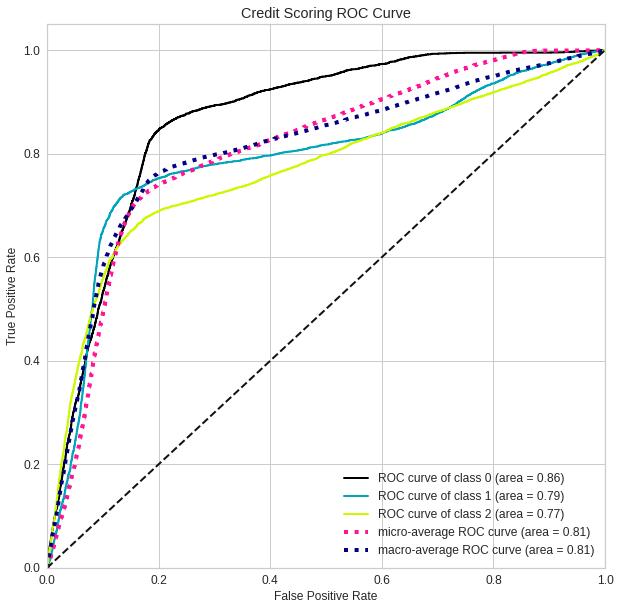

In [ ]:
y_pred_gnb_p = gnb.predict_proba(X_test_IG)
skplt.metrics.plot_roc_curve(y_test, y_pred_gnb_p, title="Credit Scoring ROC Curve", figsize=(10,10));

#### Modeling with Feature Selection Correlation Coefficient

In [ ]:
X_train_CC = X_train[correlation[correlation>=2].index]
X_test_CC = X_test[correlation[correlation>=2].index]

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_CC, y_train)
y_pred_gnb_CC = gnb.predict(X_test_CC)

In [ ]:
confusion_mat_gnb = pd.DataFrame(confusion_matrix(y_test, y_pred_gnb_CC), 
                             index = ['True[good]', 'True[poor]','True[standard]'], 
                             columns = ['Predict[good]','Predict[poor]', 'Predict[standard]'])
confusion_mat_gnb

Predict[good]  Predict[poor]  Predict[standard]
True[good]               2876             27                561
True[poor]                898           3674                957
True[standard]           2161           1467               7346

In [ ]:
print(classification_report(y_test, y_pred_gnb_CC, target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.48      0.83      0.61      3464
        poor       0.71      0.66      0.69      5529
    standard       0.83      0.67      0.74     10974

    accuracy                           0.70     19967
   macro avg       0.67      0.72      0.68     19967
weighted avg       0.74      0.70      0.70     19967



In [ ]:
precision_CC = precision_score(y_test,y_pred_gnb_CC, average='macro')
recall_CC = recall_score(y_test,y_pred_gnb_CC,average='macro')
f1_score_CC = f1_score(y_test,y_pred_gnb_CC,average='macro')
print('Precision: ',precision_CC)
print('Recall: ',recall_CC)
print('F1_score: ',f1_score_CC)

Precision:  0.6747472607888199
Recall:  0.7213835782650726
F1_score:  0.6798334717857122


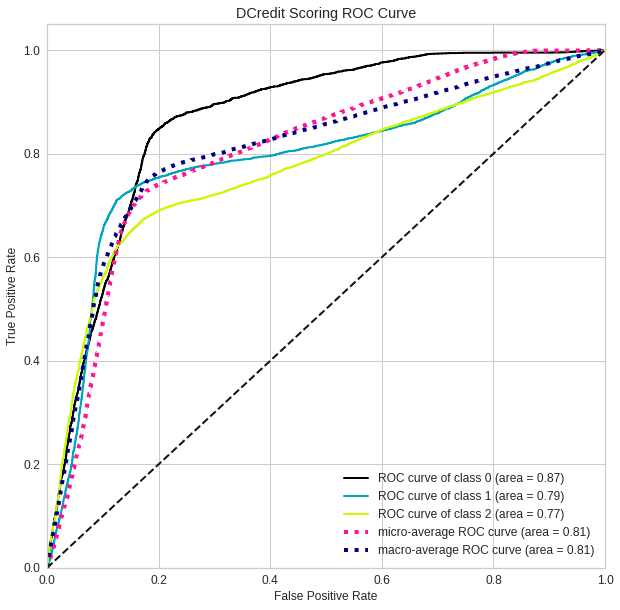

In [ ]:
y_pred_gnb_p = gnb.predict_proba(X_test_CC)
skplt.metrics.plot_roc_curve(y_test, y_pred_gnb_p, title="DCredit Scoring ROC Curve", figsize=(10,10));

### Randomforest (Ha)


####RandomForest with all the features






In [ ]:
#X_train_IG = X_train[Columns_Info_gain]
#X_test_IG = X_test[Columns_Info_gain]
#X_train_IG

Month       Age  Occupation  Credit_Utilization_Ratio  \
6060       6  0.119048          13                  0.311499   
35509      4  0.023810           8                  0.111550   
37603      6  0.333333           0                  0.089681   
8670       4  0.357143           7                  0.089048   
56596      1  0.476190           1                  0.057417   
...      ...       ...         ...                       ...   
58334      2  0.023810           9                  0.531432   
12551      2  0.119048           9                  0.382697   
1376       0  0.214286          10                  0.588335   
53355      1  0.952381           5                  0.710664   
33287      3  0.095238          12                  0.453172   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
6060                  0.342584                  1         0.594909   
35509                 0.746983                  4         0.226479   
37603                 0.218130                  5         0.475443   
8670                  0.070805                  0         0.404284   
56596                 0.115853                  4         0.322846   
...                        ...                ...              ...   
58334                 0.284869                  1         0.429700   
12551                 0.281890                  5         0.397060   
1376                  0.451707                  2         0.905939   
53355                 0.047800                  0         0.519848   
33287                 0.337018                  4         0.247703   

       Credit_History_Age_Year  Credit_History_Age_Month  
6060                  0.515152                  0.909091  
35509                 0.333333                  0.909091  
37603                 0.363636                  0.272727  
8670                  0.575758                  0.818182  
56596                 0.272727                  0.909091  
...                        ...                       ...  
58334                 0.272727                  0.909091  
12551                 0.424242                  0.454545  
1376                  0.727273                  0.363636  
53355                 0.454545                  0.909091  
33287                 0.545455                  1.000000  

[46587 rows x 9 columns]

In [ ]:
rfc = RandomForestClassifier( random_state=0, n_jobs=-1) 
rfc.fit(X_train, y_train)
# Make predition
y_pred = rfc.predict(X_test)

In [ ]:
# Show The Accuracy
accuracy_score(y_test, y_pred)

0.8209044924124806

In [ ]:
print(classification_report(y_test,y_pred,target_names=['good', 'poor', 'standard']))

              precision    recall  f1-score   support

        good       0.77      0.79      0.78      3464
        poor       0.79      0.83      0.81      5529
    standard       0.85      0.83      0.84     10974

    accuracy                           0.82     19967
   macro avg       0.81      0.81      0.81     19967
weighted avg       0.82      0.82      0.82     19967



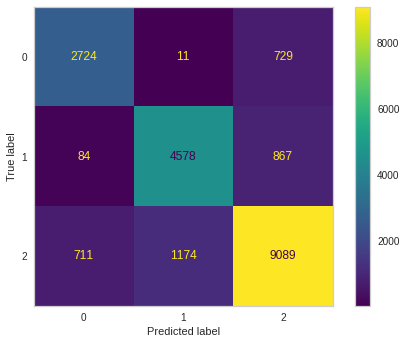

In [ ]:
#Show confusion martix

cfm = confusion_matrix(y_test, y_pred , labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                             display_labels=rfc.classes_)

disp.plot()
plt. grid(False)
plt.show()

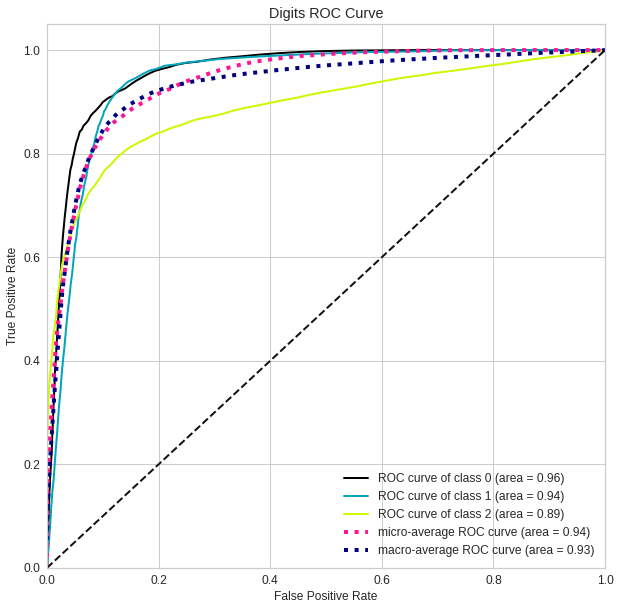

In [ ]:
#Draw ROC curve

Y_test_probs = rfc.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(10,10));

#### RandomForest with Chi-Square

In [ ]:
X_train_Xi = X_train.drop(p_values[p_values>0.05].index, axis = 1)
X_test_Xi = X_test.drop(p_values[p_values>0.05].index, axis = 1)
clf_Xi = RandomForestClassifier( random_state=0, n_jobs=-1) 
clf_Xi.fit(X_train_Xi, y_train)
y_pred_Xi = clf_Xi.predict(X_test_Xi)


In [ ]:
# Show The Accuracy
accuracy_score(y_test, y_pred_Xi)

0.8305704412280263

In [ ]:
print('precision: %.3f' % precision_score(y_test, y_pred_Xi,average='macro'))
print('recall: %.3f' % recall_score(y_test, y_pred_Xi,average='macro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_Xi,average='macro'))

precision: 0.819
recall: 0.825
F1 Score: 0.821


In [ ]:
print(classification_report(y_test,y_pred_Xi))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3464
           1       0.80      0.85      0.82      5529
           2       0.86      0.83      0.85     10974

    accuracy                           0.83     19967
   macro avg       0.82      0.82      0.82     19967
weighted avg       0.83      0.83      0.83     19967



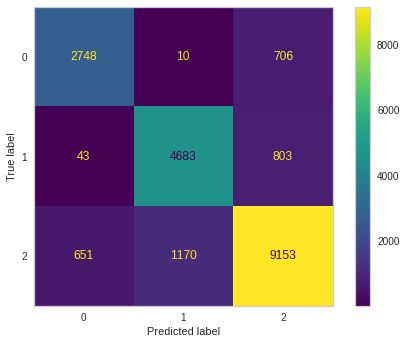

In [ ]:
#Show confusion martix

cfm = confusion_matrix(y_test, y_pred_Xi , labels=clf_Xi.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                             display_labels=clf_Xi.classes_)

disp.plot()
plt. grid(False)
plt.show()

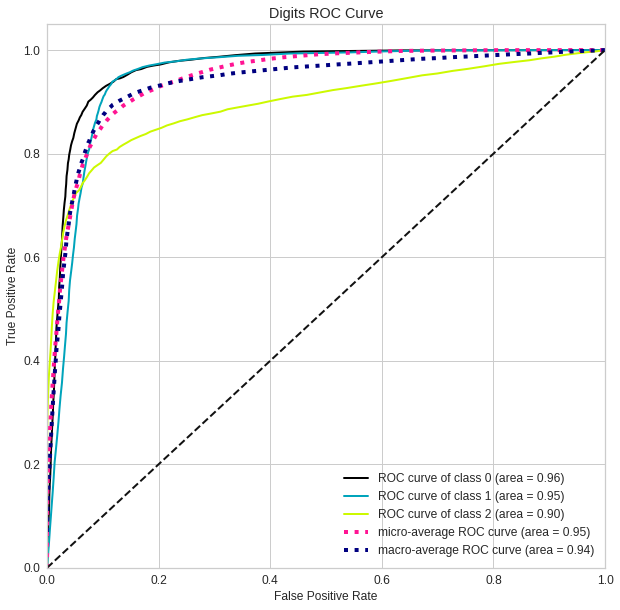

In [ ]:
#Draw ROC curve

Y_test_probs_Xi = clf_Xi.predict_proba(X_test_Xi)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs_Xi,
                       title="Digits ROC Curve", figsize=(10,10));

#### RandomForest with InformationGain



In [ ]:
X_train_IG = X_train.drop(feature_important[feature_important<0.03].index, axis = 1)
X_test_IG = X_test.drop(feature_important[feature_important<0.03].index, axis = 1)

In [ ]:
rfc_IG= RandomForestClassifier( random_state=0, n_jobs=-1) 
rfc_IG.fit(X_train_IG, y_train)
y_pred_IG = rfc_IG.predict(X_test_IG)

In [ ]:
# Show The Accuracy
accuracy_score(y_test, y_pred_IG)

0.8373315971352732

In [ ]:
print('precision: %.3f' % precision_score(y_test, y_pred_IG,average='macro'))
print('recall: %.3f' % recall_score(y_test, y_pred_IG,average='macro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_IG,average='macro'))

precision: 0.826
recall: 0.831
F1 Score: 0.828


In [ ]:
print(classification_report(y_test,y_pred_IG))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3464
           1       0.81      0.85      0.83      5529
           2       0.86      0.84      0.85     10974

    accuracy                           0.84     19967
   macro avg       0.83      0.83      0.83     19967
weighted avg       0.84      0.84      0.84     19967



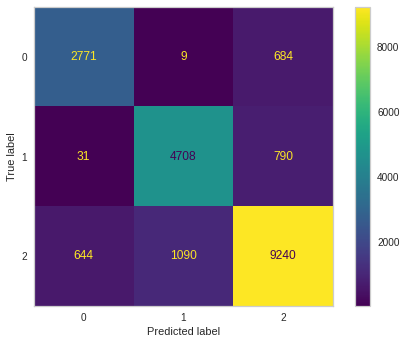

In [ ]:
#Show confusion martix

cfm = confusion_matrix(y_test, y_pred_IG , labels=rfc_IG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                             display_labels=rfc_IG.classes_)

disp.plot()
plt. grid(False)
plt.show()

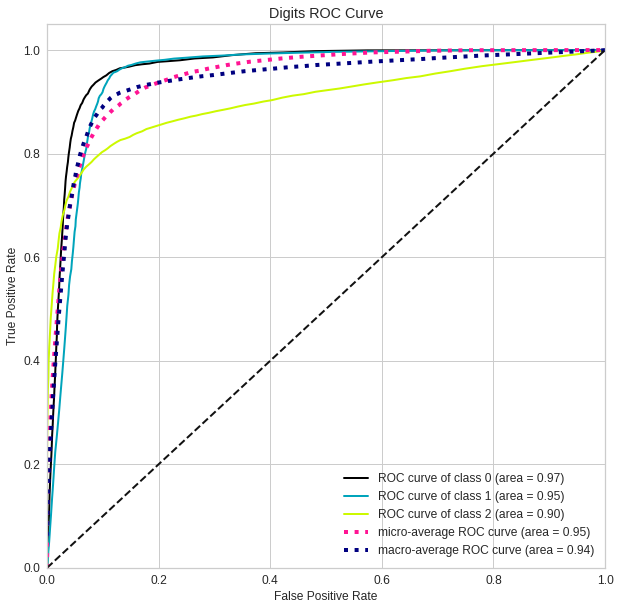

In [ ]:
#Draw ROC curve

Y_test_probs_IG = rfc_IG.predict_proba(X_test_IG)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs_IG,
                       title="Digits ROC Curve", figsize=(10,10));

#### RandomForest with Correlation

In [ ]:
X_train1 = X_train.drop(correlation[correlation<2].index, axis = 1)
X_test1 = X_test.drop(correlation[correlation<2].index, axis = 1)
rfc_CC  = RandomForestClassifier( random_state=0, n_jobs=-1) 

rfc_CC.fit(X_train1, y_train)
y_pred_CC = rfc_CC.predict(X_test1)

In [ ]:
# Show The Accuracy
accuracy_score(y_test, y_pred_CC)

0.8261631692292283

In [ ]:
print('precision: %.3f' % precision_score(y_test,  y_pred_CC,average='macro'))
print('recall: %.3f' % recall_score(y_test,  y_pred_CC,average='macro'))
print('F1 Score: %.3f' % f1_score(y_test,  y_pred_CC,average='macro'))

precision: 0.813
recall: 0.818
F1 Score: 0.815


In [ ]:
print(classification_report(y_test,y_pred_CC))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      3464
           1       0.80      0.83      0.82      5529
           2       0.85      0.84      0.84     10974

    accuracy                           0.83     19967
   macro avg       0.81      0.82      0.82     19967
weighted avg       0.83      0.83      0.83     19967



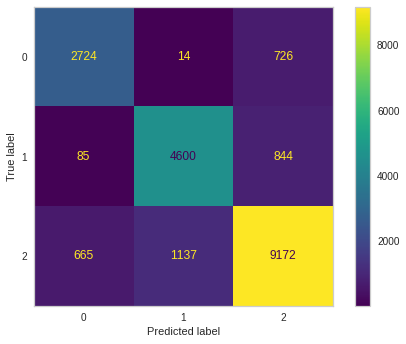

In [ ]:

#Show confusion martix

cfm = confusion_matrix(y_test, y_pred_CC , labels=rfc_CC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                             display_labels=rfc_CC.classes_)

disp.plot()
plt. grid(False)
plt.show()

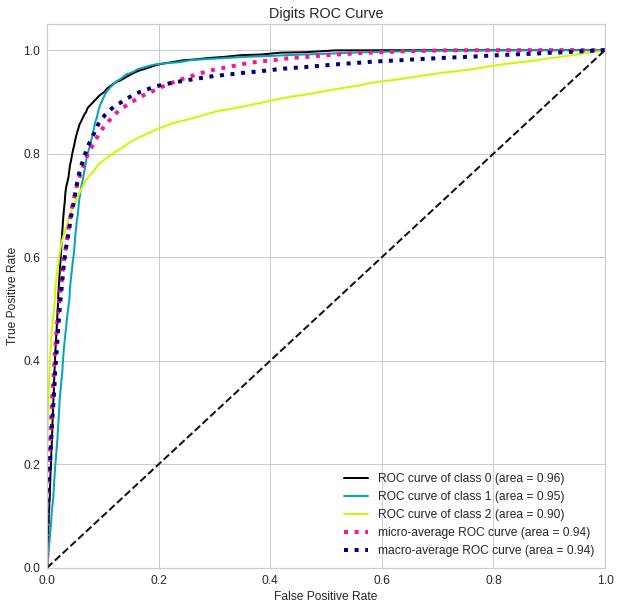

In [ ]:
#Draw ROC curve

Y_test_probs_CC = rfc_CC.predict_proba(X_test1)
skplt.metrics.plot_roc_curve(y_test, Y_test_probs_CC,
                       title="Digits ROC Curve", figsize=(10,10));